
# NYC Taxi and Limousine Commission (TLC) Trip Analysis - 2024

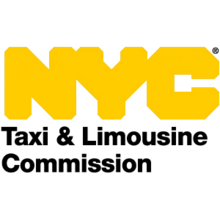 


## Introduction

#### This project leverages the official dataset of the NYC Taxi and Limousine Commission (TLC) for the period from January to August 2024. The primary goal is to conduct a detailed Exploratory Data Analysis (EDA) to uncover trends, patterns, and insights into NYC taxi trips, contributing to data-driven decision-making.


((( NOTE ))) : All the Datasets and Analysis are only of Yellow Taxis and do not comprise of the Green Taxis in NYC.


### Required Libraries

We begin by importing libraries essential for this analysis:  
- **Pandas**: For data manipulation and cleaning.  
- **NumPy**: For numerical computations.  
- **OS**: For managing directory access and file handling.


In [129]:
import pandas as pd
import numpy as np
import os

Uploading the January 24' dataset for TLC rides

In [130]:
df = pd.read_parquet(r'C:\Users\sunny\Desktop\Py_DS_ML_Bootcamp-master\TCL trip Project\yellow_tripdata_2024-01.parquet')

In [131]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


# Data Cleaning 
In next few codes we are cleaning the unwanted data to make it clean for Manipulation and Analysis.

Upon looking at the 'passenger_count' & 'RatecodeID' columns in the DataFrame , we see that we have NaN values so let's clear those rows and also clear out any duplicates if found.



In [132]:
df[df['passenger_count'].isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2824462,2,2024-01-01 00:34:19,2024-01-01 00:51:22,NaN,2.04,NaN,None,143,141,0,12.72,0.00,0.5,0.00,0.00,1.0,16.72,NaN,NaN
2824463,1,2024-01-01 00:14:31,2024-01-01 00:19:29,NaN,1.60,NaN,None,236,238,0,9.30,1.00,0.5,2.86,0.00,1.0,17.16,NaN,NaN
2824464,1,2024-01-01 00:35:11,2024-01-01 01:13:40,NaN,0.00,NaN,None,142,79,0,21.01,0.00,0.5,0.00,0.00,1.0,25.01,NaN,NaN
2824465,1,2024-01-01 00:33:37,2024-01-01 00:50:34,NaN,0.00,NaN,None,237,4,0,17.79,0.00,0.5,0.00,0.00,1.0,21.79,NaN,NaN
2824466,1,2024-01-01 00:49:04,2024-01-01 01:01:16,NaN,0.00,NaN,None,244,50,0,34.65,0.00,0.5,0.00,0.00,1.0,38.65,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


Confirming if NaN values are different than 0 values.

In [133]:
df[df['passenger_count']==0.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.0,1.0,N,246,231,2,25.4,3.50,0.5,0.00,0.00,1.0,30.40,2.5,0.00
261,1,2024-01-01 00:49:42,2024-01-01 00:58:21,0.0,2.9,1.0,N,87,79,1,14.9,3.50,0.5,5.00,0.00,1.0,24.90,2.5,0.00
325,1,2024-01-01 00:42:26,2024-01-01 01:12:01,0.0,16.6,2.0,N,132,233,1,70.0,4.25,0.5,16.53,6.94,1.0,99.22,2.5,1.75
343,1,2024-01-01 00:38:18,2024-01-01 01:01:12,0.0,2.5,1.0,N,90,229,1,17.0,3.50,0.5,5.50,0.00,1.0,27.50,2.5,0.00
446,1,2024-01-01 00:26:21,2024-01-01 00:38:03,0.0,3.4,1.0,N,137,263,1,15.6,3.50,0.5,2.06,0.00,1.0,22.66,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824130,1,2024-01-31 23:05:42,2024-01-31 23:10:12,0.0,1.1,1.0,Y,161,107,1,7.2,3.50,0.5,2.40,0.00,1.0,14.60,2.5,0.00
2824207,1,2024-01-31 23:37:43,2024-01-31 23:45:33,0.0,0.9,1.0,N,170,186,1,9.3,3.50,0.5,2.00,0.00,1.0,16.30,2.5,0.00
2824208,1,2024-01-31 23:51:19,2024-02-01 00:21:03,0.0,4.8,1.0,N,68,226,1,31.0,3.50,0.5,7.20,0.00,1.0,43.20,2.5,0.00
2824369,1,2024-01-31 23:00:39,2024-01-31 23:17:20,0.0,2.4,1.0,N,230,107,1,16.3,3.50,0.5,4.25,0.00,1.0,25.55,2.5,0.00


Even the rows where column 'passenger_count' is 0 we cannot find meaning analysis from it so let us remove these rows.

There are 32456 rows with 0 miles distance as their trip distance, which makes no sense as the other columns are completely valid. So we have noted this discrepancy and will drop these rows so that it will not hamper our analysis further.

In [134]:
df.drop(df[df['passenger_count']==0.0].index,inplace= True)

In [135]:
#to count all the duplicated rows
df.duplicated().sum()

np.int64(0)

In [136]:
#dropping all the NaN values from 'passenger_count'
df.dropna(subset=['passenger_count'],inplace=True)

In [137]:
#checking if any rows left having NaN in 'passenger_count'
df[df['passenger_count'].isna()].shape[0]

0

In [138]:
#checking if ny rows left having NaN in 'RatecodeID'
df[df['RatecodeID'].isna()].shape[0]

0

So we do not have any invalid entries in 'passenger_count' and 'RatecodeID' anymore.

But we also noticed that the 'total_amount' is wrongly calculated here as it has excluded the columns 'congestion_surcharge' and 'Airport_fee'. Let's clean these.

In [139]:
# new column 'final_bill' is made to check it side by side with 'total_amount' to see what is wrong.
df['final_bill'] = df['fare_amount'] + df['extra'] + df['mta_tax']+ df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge'] + df['congestion_surcharge'] + df['Airport_fee'] 
df[['total_amount','final_bill']]

,total_amount,final_bill
0,22.70,22.70
1,18.75,21.25
2,31.30,33.80
3,17.00,19.50
4,16.10,18.60
...,...,...
2824456,43.20,43.20
2824457,30.31,30.31
2824458,29.25,29.25
2824459,23.70,26.20


Total Amount column doesnot add all the fees and charges column properly so let's remove the column and use 'final_bill' as ou final amount.

In [140]:
#dropping the 'total_amount' column
df.drop(columns = ['total_amount'],inplace =True)

In [141]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,final_bill
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,2.5,0.0,22.70
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,2.5,0.0,21.25
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,2.5,0.0,33.80
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,2.5,0.0,19.50
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,2.5,0.0,18.60


Feature Engineering: We need to extract the hours and date individually from datetime columns of pickup and dropoff column.

In [142]:
# creating new columns from datetime column to isolate hours and date.
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df['pickup_time'] = df['tpep_pickup_datetime'].dt.time
df['dropoff_date'] = df['tpep_dropoff_datetime'].dt.date
df['dropoff_time'] = df['tpep_dropoff_datetime'].dt.time
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,final_bill,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,...,0.00,0.0,1.0,2.5,0.0,22.70,2024-01-01,00:57:55,2024-01-01,01:17:43
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,...,3.75,0.0,1.0,2.5,0.0,21.25,2024-01-01,00:03:00,2024-01-01,00:09:36
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,...,3.00,0.0,1.0,2.5,0.0,33.80,2024-01-01,00:17:06,2024-01-01,00:35:01
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,...,2.00,0.0,1.0,2.5,0.0,19.50,2024-01-01,00:36:38,2024-01-01,00:44:56
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,...,3.20,0.0,1.0,2.5,0.0,18.60,2024-01-01,00:46:51,2024-01-01,00:52:57


The dataset however has unnecessary data of invalid dates which either belong to previous month or the next month. Our next steps will be to remove those rows with invalid dates, removing the main datetime columns 'tpep_pickup_datetime' & 'tpep_dropoff_datetime' as we have successfully extracted the hours and dates from them.

In [143]:
#to operate any action on the extracted date columns, we will need it back in datetime format. Let's do the formatting.

df['pickup_date'] =pd.to_datetime(df['pickup_date'])
df['dropoff_date'] =pd.to_datetime(df['dropoff_date'])

In [144]:
#removing the invalid dates not in range.
df.drop(df[df['pickup_date']>'2024-01-31'].index,inplace = True)
df.drop(df[df['pickup_date']<'2024-01-01'].index,inplace = True)

In [145]:
df.drop(columns = ['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace = True)

In [146]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,final_bill,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1.0,1.72,1.0,N,186,79,2,17.7,1.0,...,0.00,0.0,1.0,2.5,0.0,22.70,2024-01-01,00:57:55,2024-01-01,01:17:43
1,1,1.0,1.80,1.0,N,140,236,1,10.0,3.5,...,3.75,0.0,1.0,2.5,0.0,21.25,2024-01-01,00:03:00,2024-01-01,00:09:36
2,1,1.0,4.70,1.0,N,236,79,1,23.3,3.5,...,3.00,0.0,1.0,2.5,0.0,33.80,2024-01-01,00:17:06,2024-01-01,00:35:01
3,1,1.0,1.40,1.0,N,79,211,1,10.0,3.5,...,2.00,0.0,1.0,2.5,0.0,19.50,2024-01-01,00:36:38,2024-01-01,00:44:56
4,1,1.0,0.80,1.0,N,211,148,1,7.9,3.5,...,3.20,0.0,1.0,2.5,0.0,18.60,2024-01-01,00:46:51,2024-01-01,00:52:57


We are taking a 5% fraction as sample to work on this data

In [147]:
sample1 = df.sample(frac = 0.05)

In [148]:
#checking if the date range is correct.
sample1['pickup_date'].value_counts()

pickup_date
2024-01-27    5254
2024-01-25    5195
2024-01-11    5107
2024-01-18    5059
2024-01-17    5008
2024-01-24    5004
2024-01-26    4995
2024-01-13    4989
2024-01-04    4956
2024-01-31    4945
2024-01-20    4941
2024-01-05    4917
2024-01-30    4863
2024-01-23    4841
2024-01-12    4764
2024-01-06    4632
2024-01-10    4544
2024-01-19    4517
2024-01-16    4333
2024-01-14    4328
2024-01-28    4288
2024-01-09    4248
2024-01-22    4158
2024-01-29    4015
2024-01-03    3985
2024-01-21    3904
2024-01-08    3781
2024-01-02    3717
2024-01-15    3626
2024-01-01    3499
2024-01-07    3236
Name: count, dtype: int64

### AUTOMATION OF DATA CLEANING STEPS: 
#### Now we will define a function that will automate all of the above processes to clean and after that we produce sample dataframes of all the months till August 2024 so that we can merge the sample files and make us a final DataFrame to work upon.

In [149]:
# This function is to clean the data before sampling. Note that we are deliberately not sampling it as the cleaning of unnecessary dates is to be done before sampling

def cleaned_data(file):
    file = file.drop_duplicates()
    file.dropna(subset=['passenger_count'],inplace=True)
    file.drop(file[file['passenger_count']==0.0].index,inplace= True)
    file.drop(file[file['trip_distance']==0.0].index,inplace= True)
    file['final_bill'] = file['fare_amount'] + file['extra'] + file['mta_tax']+ file['tip_amount'] + file['tolls_amount'] + file['improvement_surcharge'] + file['congestion_surcharge'] + file['Airport_fee'] 
    file.drop(columns = ['total_amount'],inplace =True)
    file['pickup_date'] = file['tpep_pickup_datetime'].dt.date
    file['pickup_time'] = file['tpep_pickup_datetime'].dt.time
    file['dropoff_date'] = file['tpep_dropoff_datetime'].dt.date
    file['dropoff_time'] = file['tpep_dropoff_datetime'].dt.time
    file['pickup_date'] =pd.to_datetime(file['pickup_date'])
    file['dropoff_date'] =pd.to_datetime(file['dropoff_date'])
    file.drop(columns = ['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace = True)
    
    return file

In [150]:
#checking all the months' dataframe in directory
os.listdir(r'C:\Users\saysa\Desktop\Py_DS_ML_Bootcamp-master\TCL trip Project')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'NYC_TLC_Project.ipynb',
 'UberProject',
 'yellow_tripdata_2024-01.parquet',
 'yellow_tripdata_2024-02.parquet',
 'yellow_tripdata_2024-03.parquet',
 'yellow_tripdata_2024-04.parquet',
 'yellow_tripdata_2024-05.parquet',
 'yellow_tripdata_2024-06.parquet',
 'yellow_tripdata_2024-07.parquet',
 'yellow_tripdata_2024-08.parquet']

In [151]:
#importing the february dataset
feb = pd.read_parquet(r'C:\Users\saysa\Desktop\Py_DS_ML_Bootcamp-master\TCL trip Project\yellow_tripdata_2024-02.parquet')

In [152]:
feb.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-02-01 00:04:45,2024-02-01 00:19:58,1.0,4.39,1.0,N,68,236,1,20.5,1.0,0.5,1.28,0.00,1.0,26.78,2.5,0.00
1,2,2024-02-01 00:56:31,2024-02-01 01:10:53,1.0,7.71,1.0,N,48,243,1,31.0,1.0,0.5,9.00,0.00,1.0,45.00,2.5,0.00
2,2,2024-02-01 00:07:50,2024-02-01 00:43:12,2.0,28.69,2.0,N,132,261,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,1,2024-02-01 00:01:49,2024-02-01 00:10:47,1.0,1.10,1.0,N,161,163,1,9.3,3.5,0.5,2.85,0.00,1.0,17.15,2.5,0.00
4,1,2024-02-01 00:37:35,2024-02-01 00:51:15,1.0,2.60,1.0,N,246,79,2,15.6,3.5,0.5,0.00,0.00,1.0,20.60,2.5,0.00


In [153]:
#Automating the process of cleaning
cleaned_feb = cleaned_data(feb)

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\2341769706.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\2341769706.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\2341769706.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\2341769706.py:8: SettingWithCopyWarning:


A value

In [154]:
cleaned_feb.shape

(2752805, 21)

In [155]:
#importing the march dataset
march = pd.read_parquet(r'C:\Users\saysa\Desktop\Py_DS_ML_Bootcamp-master\TCL trip Project\yellow_tripdata_2024-03.parquet')

In [156]:
#Automating the process of cleaning
cleaned_march = cleaned_data(march)

In [157]:
cleaned_march.shape

(3077013, 21)

In [158]:
#importing the april dataset
april = pd.read_parquet(r'C:\Users\saysa\Desktop\Py_DS_ML_Bootcamp-master\TCL trip Project\yellow_tripdata_2024-04.parquet')

In [159]:
#Automating the process of cleaning
cleaned_april = cleaned_data(april)

In [160]:
cleaned_april.shape

(3027871, 21)

In [161]:
#importing the may dataset
may = pd.read_parquet(r'C:\Users\saysa\Desktop\Py_DS_ML_Bootcamp-master\TCL trip Project\yellow_tripdata_2024-05.parquet')

In [162]:
#Automating the process of cleaning
cleaned_may = cleaned_data(may)

In [163]:
cleaned_may.shape

(3237759, 21)

In [164]:
#importing the June dataset
june = pd.read_parquet(r'C:\Users\saysa\Desktop\Py_DS_ML_Bootcamp-master\TCL trip Project\yellow_tripdata_2024-06.parquet')

In [165]:
#Automating the process of cleaning
cleaned_june = cleaned_data(june)

In [166]:
cleaned_june.shape

(3051524, 21)

In [167]:
#importing the july dataset
july = pd.read_parquet(r'C:\Users\saysa\Desktop\Py_DS_ML_Bootcamp-master\TCL trip Project\yellow_tripdata_2024-07.parquet')

In [168]:
#Automating the process of cleaning
cleaned_july = cleaned_data(july)

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\2341769706.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\2341769706.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\2341769706.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\2341769706.py:8: SettingWithCopyWarning:


A value

In [169]:
cleaned_july.shape

(2729781, 21)

In [170]:
#importing the august dataset
august = pd.read_parquet(r'C:\Users\saysa\Desktop\Py_DS_ML_Bootcamp-master\TCL trip Project\yellow_tripdata_2024-08.parquet')

In [171]:
#Automating the process of cleaning
cleaned_august = cleaned_data(august)

In [172]:
cleaned_august.shape

(2653051, 21)

We also have to make sure no invalid date values should be there in a paricular month's dataset. This next code block will remove all the invalid dates.

In [173]:
cleaned_feb.drop(cleaned_feb[cleaned_feb['pickup_date']>'2024-02-29'].index,inplace = True)
cleaned_feb.drop(cleaned_feb[cleaned_feb['pickup_date']<'2024-02-01'].index,inplace = True)

cleaned_march.drop(cleaned_march[cleaned_march['pickup_date']>'2024-03-31'].index,inplace = True)
cleaned_march.drop(cleaned_march[cleaned_march['pickup_date']<'2024-03-01'].index,inplace = True)

cleaned_april.drop(cleaned_april[cleaned_april['pickup_date']>'2024-04-30'].index,inplace = True)
cleaned_april.drop(cleaned_april[cleaned_april['pickup_date']<'2024-04-01'].index,inplace = True)

cleaned_may.drop(cleaned_may[cleaned_may['pickup_date']>'2024-05-31'].index,inplace = True)
cleaned_may.drop(cleaned_may[cleaned_may['pickup_date']<'2024-05-01'].index,inplace = True)

cleaned_june.drop(cleaned_june[cleaned_june['pickup_date']>'2024-06-30'].index,inplace = True)
cleaned_june.drop(cleaned_june[cleaned_june['pickup_date']<'2024-06-01'].index,inplace = True)

cleaned_july.drop(cleaned_july[cleaned_july['pickup_date']>'2024-07-31'].index,inplace = True)
cleaned_july.drop(cleaned_july[cleaned_july['pickup_date']<'2024-07-01'].index,inplace = True)

cleaned_august.drop(cleaned_august[cleaned_august['pickup_date']>'2024-08-31'].index,inplace = True)
cleaned_august.drop(cleaned_august[cleaned_august['pickup_date']<'2024-08-01'].index,inplace = True)

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\701913997.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\701913997.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\701913997.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\701913997.py:17: SettingWithCopyWarning:


A value i

In [174]:
#Sampling all the month's dataset 5% of original dataset
sample2 = cleaned_feb.sample(frac =0.05)
sample3 = cleaned_march.sample(frac =0.05)
sample4 = cleaned_april.sample(frac =0.05)
sample5 = cleaned_may.sample(frac =0.05)
sample6 = cleaned_june.sample(frac =0.05)
sample7 = cleaned_july.sample(frac =0.05)
sample8 = cleaned_august.sample(frac =0.05)

In [175]:
#merging all the months' samples into a single dataframe
tlcdf = pd.concat([sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8])
tlcdf.shape

(1166129, 21)

In [176]:
tlcdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1166129 entries, 2407855 to 503651
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1166129 non-null  int32         
 1   passenger_count        1166129 non-null  float64       
 2   trip_distance          1166129 non-null  float64       
 3   RatecodeID             1166129 non-null  float64       
 4   store_and_fwd_flag     1166129 non-null  object        
 5   PULocationID           1166129 non-null  int32         
 6   DOLocationID           1166129 non-null  int32         
 7   payment_type           1166129 non-null  int64         
 8   fare_amount            1166129 non-null  float64       
 9   extra                  1166129 non-null  float64       
 10  mta_tax                1166129 non-null  float64       
 11  tip_amount             1166129 non-null  float64       
 12  tolls_amount           11661

We have to extract the hours of pickup and dropoff from 'pickup_time' and 'dropoff_time' columns by first converting them into str type and slicing it to get the first 2 characters(hours).

In [177]:
#converting into str type 
tlcdf['pickup_time'] =tlcdf['pickup_time'].astype(str)
tlcdf['dropoff_time']=tlcdf['dropoff_time'].astype(str)

#slicing in string to get the hour value
tlcdf['pickup_hours'] = tlcdf['pickup_time'].str.slice(0,2).astype(int)
tlcdf['dropoff_hours'] = tlcdf['dropoff_time'].str.slice(0,2).astype(int)

In [178]:
#converting it back to the datetime type now
tlcdf['pickup_time'] = pd.to_datetime(tlcdf['pickup_time'], format='%H:%M:%S')
tlcdf['dropoff_time'] = pd.to_datetime(tlcdf['dropoff_time'], format='%H:%M:%S')

In [179]:
# function to handle overnight differences
def calculate_time_difference(pickup, dropoff):
    if dropoff < pickup:  # If the drop-off time is earlier in the day
        dropoff += pd.Timedelta(days=1)  # Add one day
    return dropoff - pickup

# Apply the function to your DataFrame
tlcdf['time_difference'] = tlcdf.apply(
    lambda row: calculate_time_difference(row['pickup_time'], row['dropoff_time']),
    axis=1
)


In [180]:
tlcdf.head(10)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,congestion_surcharge,Airport_fee,final_bill,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_hours,dropoff_hours,time_difference
2407855,2,1.0,5.12,1.0,N,148,143,2,38.0,0.00,...,2.5,0.00,42.00,2024-01-27,1900-01-01 15:32:44,2024-01-27,1900-01-01 16:16:00,15,16,0 days 00:43:16
852755,1,1.0,2.20,1.0,N,100,237,1,19.1,2.50,...,2.5,0.00,31.35,2024-01-11,1900-01-01 09:26:44,2024-01-11,1900-01-01 09:46:26,9,9,0 days 00:19:42
1251882,2,1.0,9.71,1.0,N,138,68,1,47.1,5.00,...,2.5,1.75,77.75,2024-01-15,1900-01-01 12:58:38,2024-01-15,1900-01-01 13:33:53,12,13,0 days 00:35:15
1070486,1,1.0,2.30,1.0,N,162,142,1,19.8,2.50,...,2.5,0.00,31.05,2024-01-13,1900-01-01 12:59:38,2024-01-13,1900-01-01 13:21:00,12,13,0 days 00:21:22
649000,2,1.0,8.11,1.0,N,132,95,2,33.1,1.00,...,0.0,1.75,37.35,2024-01-08,1900-01-01 20:31:04,2024-01-08,1900-01-01 20:48:47,20,20,0 days 00:17:43
2227655,1,1.0,14.90,1.0,N,138,181,1,58.3,9.25,...,0.0,1.75,84.60,2024-01-25,1900-01-01 19:34:07,2024-01-25,1900-01-01 20:13:14,19,20,0 days 00:39:07
2515716,2,1.0,2.17,1.0,N,170,237,1,13.5,0.00,...,2.5,0.00,21.00,2024-01-28,1900-01-01 16:11:17,2024-01-28,1900-01-01 16:22:38,16,16,0 days 00:11:21
1045034,1,1.0,6.10,1.0,N,68,255,1,29.6,3.50,...,2.5,0.00,44.00,2024-01-13,1900-01-01 01:24:55,2024-01-13,1900-01-01 01:53:35,1,1,0 days 00:28:40
2422580,2,3.0,0.75,1.0,N,186,68,1,8.6,0.00,...,2.5,0.00,15.12,2024-01-27,1900-01-01 18:56:03,2024-01-27,1900-01-01 19:04:09,18,19,0 days 00:08:06
1272777,1,2.0,0.90,1.0,N,238,238,1,7.9,2.50,...,2.5,0.00,16.75,2024-01-15,1900-01-01 16:01:52,2024-01-15,1900-01-01 16:08:08,16,16,0 days 00:06:16


In [181]:
#extracting the Day name, Month name and Day number of month so that we can dive deeper into analysis.
tlcdf['days'] = tlcdf['pickup_date'].dt.day_name()
tlcdf['month'] = tlcdf['pickup_date'].dt.month_name()
tlcdf['daynumber'] = tlcdf['pickup_date'].dt.day

#Final dataset is complete for EDA and Data Visualisation
tlcdf.head(10)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_hours,dropoff_hours,time_difference,days,month,daynumber
2407855,2,1.0,5.12,1.0,N,148,143,2,38.0,0.00,...,2024-01-27,1900-01-01 15:32:44,2024-01-27,1900-01-01 16:16:00,15,16,0 days 00:43:16,Saturday,January,27
852755,1,1.0,2.20,1.0,N,100,237,1,19.1,2.50,...,2024-01-11,1900-01-01 09:26:44,2024-01-11,1900-01-01 09:46:26,9,9,0 days 00:19:42,Thursday,January,11
1251882,2,1.0,9.71,1.0,N,138,68,1,47.1,5.00,...,2024-01-15,1900-01-01 12:58:38,2024-01-15,1900-01-01 13:33:53,12,13,0 days 00:35:15,Monday,January,15
1070486,1,1.0,2.30,1.0,N,162,142,1,19.8,2.50,...,2024-01-13,1900-01-01 12:59:38,2024-01-13,1900-01-01 13:21:00,12,13,0 days 00:21:22,Saturday,January,13
649000,2,1.0,8.11,1.0,N,132,95,2,33.1,1.00,...,2024-01-08,1900-01-01 20:31:04,2024-01-08,1900-01-01 20:48:47,20,20,0 days 00:17:43,Monday,January,8
2227655,1,1.0,14.90,1.0,N,138,181,1,58.3,9.25,...,2024-01-25,1900-01-01 19:34:07,2024-01-25,1900-01-01 20:13:14,19,20,0 days 00:39:07,Thursday,January,25
2515716,2,1.0,2.17,1.0,N,170,237,1,13.5,0.00,...,2024-01-28,1900-01-01 16:11:17,2024-01-28,1900-01-01 16:22:38,16,16,0 days 00:11:21,Sunday,January,28
1045034,1,1.0,6.10,1.0,N,68,255,1,29.6,3.50,...,2024-01-13,1900-01-01 01:24:55,2024-01-13,1900-01-01 01:53:35,1,1,0 days 00:28:40,Saturday,January,13
2422580,2,3.0,0.75,1.0,N,186,68,1,8.6,0.00,...,2024-01-27,1900-01-01 18:56:03,2024-01-27,1900-01-01 19:04:09,18,19,0 days 00:08:06,Saturday,January,27
1272777,1,2.0,0.90,1.0,N,238,238,1,7.9,2.50,...,2024-01-15,1900-01-01 16:01:52,2024-01-15,1900-01-01 16:08:08,16,16,0 days 00:06:16,Monday,January,15


# EDA and DATA VISUALISATION

 Now that we are done with all the data wrangling part, we will start EDA and visualising for better visual analysis.

In [182]:
#importing Seaborn, Matplotlib and Plotly libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot 
init_notebook_mode(connected=True)

# - DAYS OF WEEK v/s TOTAL RIDES

In [183]:
#setting up an order in Day names and Month names chronologically
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
order_months = ['January','February','March','April','May','June','July','August']

tlcdf['month'] = pd.Categorical(tlcdf['month'],categories = order_months, ordered =True)
tlcdf['days'] = pd.Categorical(tlcdf['days'],categories = order_days, ordered =True)

# Table for Weekdays vs Rides
tlcdf['days'].value_counts().reset_index().sort_values('days')

,days,count
5,Monday,147650
4,Tuesday,170314
1,Wednesday,179340
0,Thursday,185140
2,Friday,172886
3,Saturday,170853
6,Sunday,139946


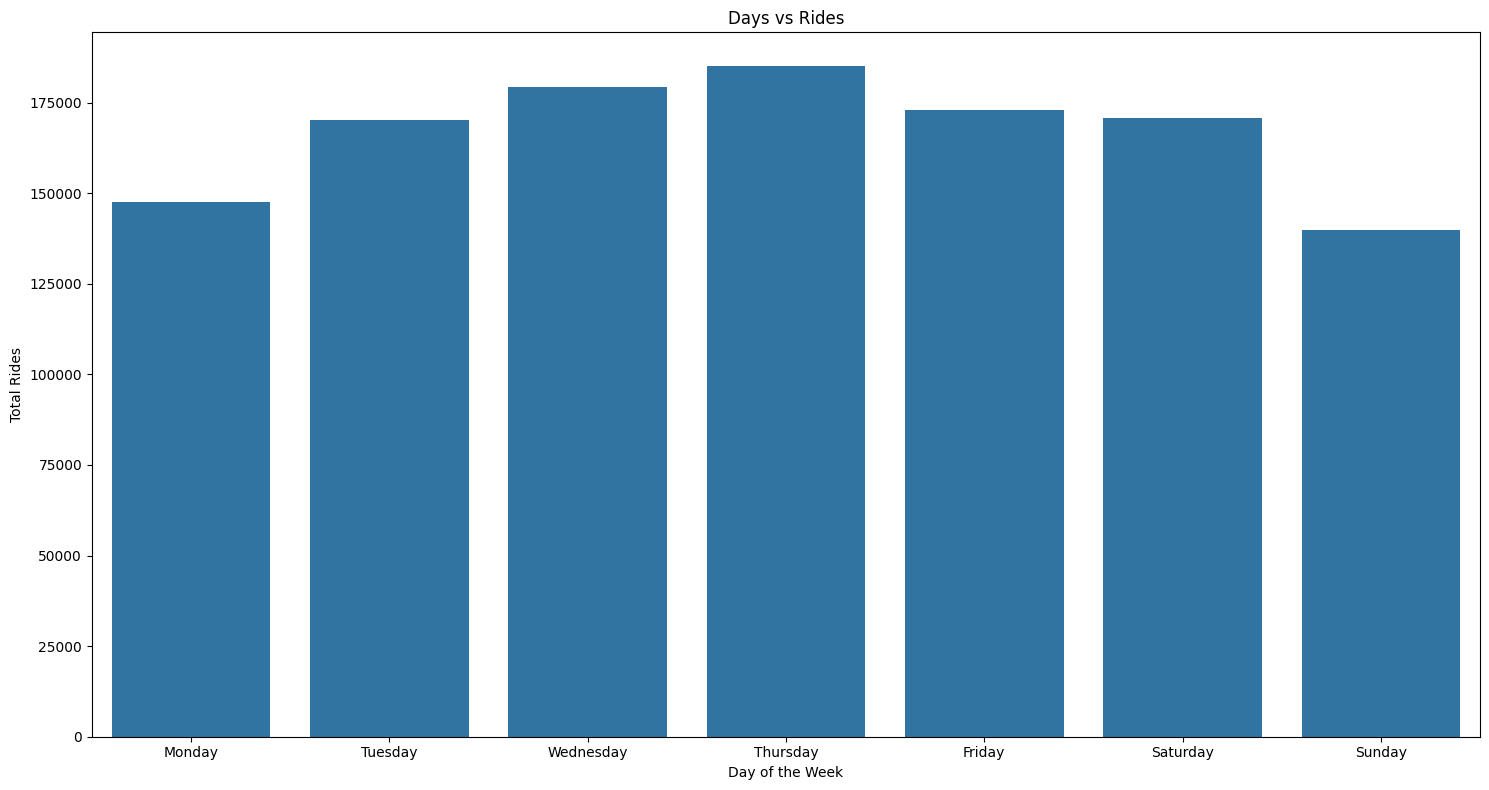

In [184]:
# Countplot for Days in week vs Count of rides
plt.figure(figsize=(15,8))
sns.countplot(x='days',data=tlcdf)
plt.xlabel('Day of the Week')
plt.ylabel('Total Rides')
plt.title('Days vs Rides')
plt.tight_layout()

# - DAYS IN MONTH v/s TOTAL RIDES

In [185]:
#Table for daynumber vs ride counts
tlcdf['daynumber'].value_counts().reset_index().sort_values('daynumber')

,daynumber,count
14,1,38240
13,2,38437
23,3,37450
26,4,36820
21,5,37803
2,6,39486
22,7,37608
11,8,38513
1,9,39580
5,10,39276


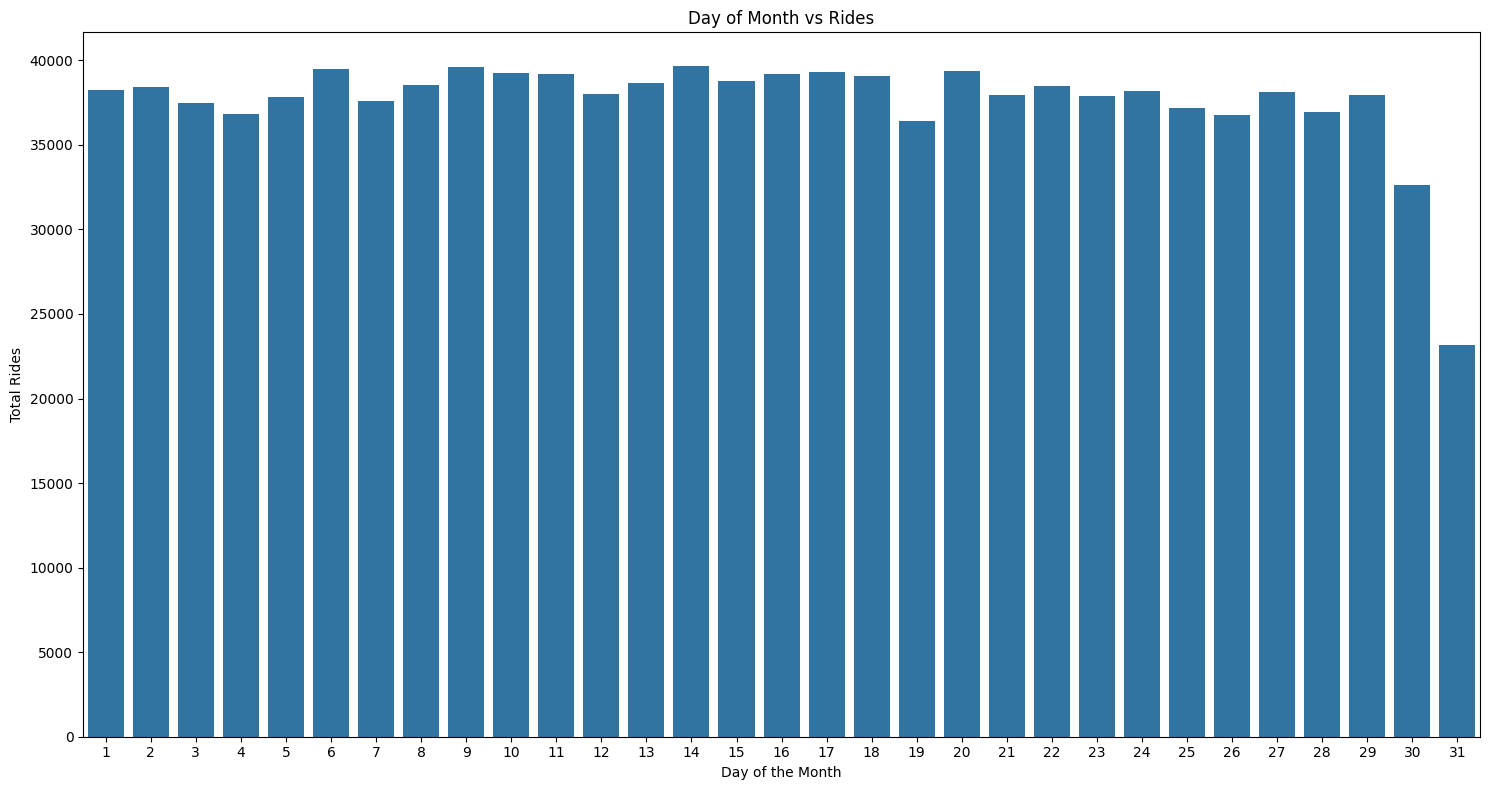

In [186]:
#Count plot for daynumber vs ride counts
plt.figure(figsize=(15,8))
sns.countplot(x='daynumber',data=tlcdf)
plt.xlabel('Day of the Month')
plt.ylabel('Total Rides')
plt.title('Day of Month vs Rides')
plt.tight_layout()

# - PICKUP HOURS v/s TOTAL RIDES

In [187]:
#Table for Pickup hours vs ride counts
tlcdf['pickup_hours'].value_counts().reset_index().sort_values('pickup_hours')

,pickup_hours,count
16,0,31065
18,1,20501
20,2,13393
21,3,8744
23,4,5450
22,5,6641
19,6,15303
17,7,30748
15,8,43218
13,9,49717


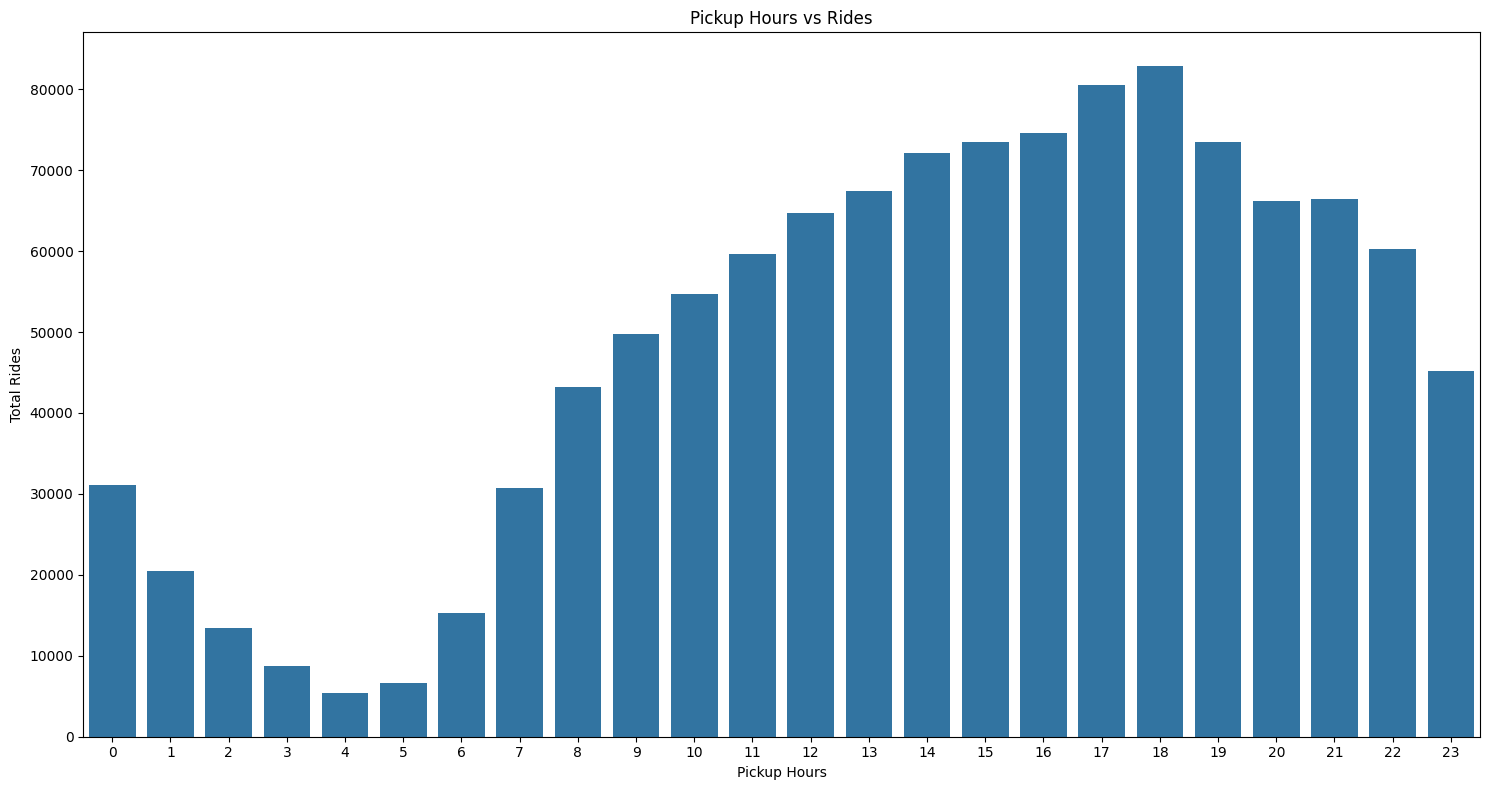

In [188]:
plt.figure(figsize=(15,8))
sns.countplot(x='pickup_hours',data=tlcdf)
plt.xlabel('Pickup Hours')
plt.ylabel('Total Rides')
plt.title('Pickup Hours vs Rides')
plt.tight_layout()

# - MONTHS v/s TOTAL RIDES

In [189]:
#Table for Months vs ride counts
tlcdf['month'].value_counts().reset_index().sort_values('month')

,month,count
4,January,139649
5,February,137640
1,March,153850
3,April,151393
0,May,161886
2,June,152574
6,July,136487
7,August,132650


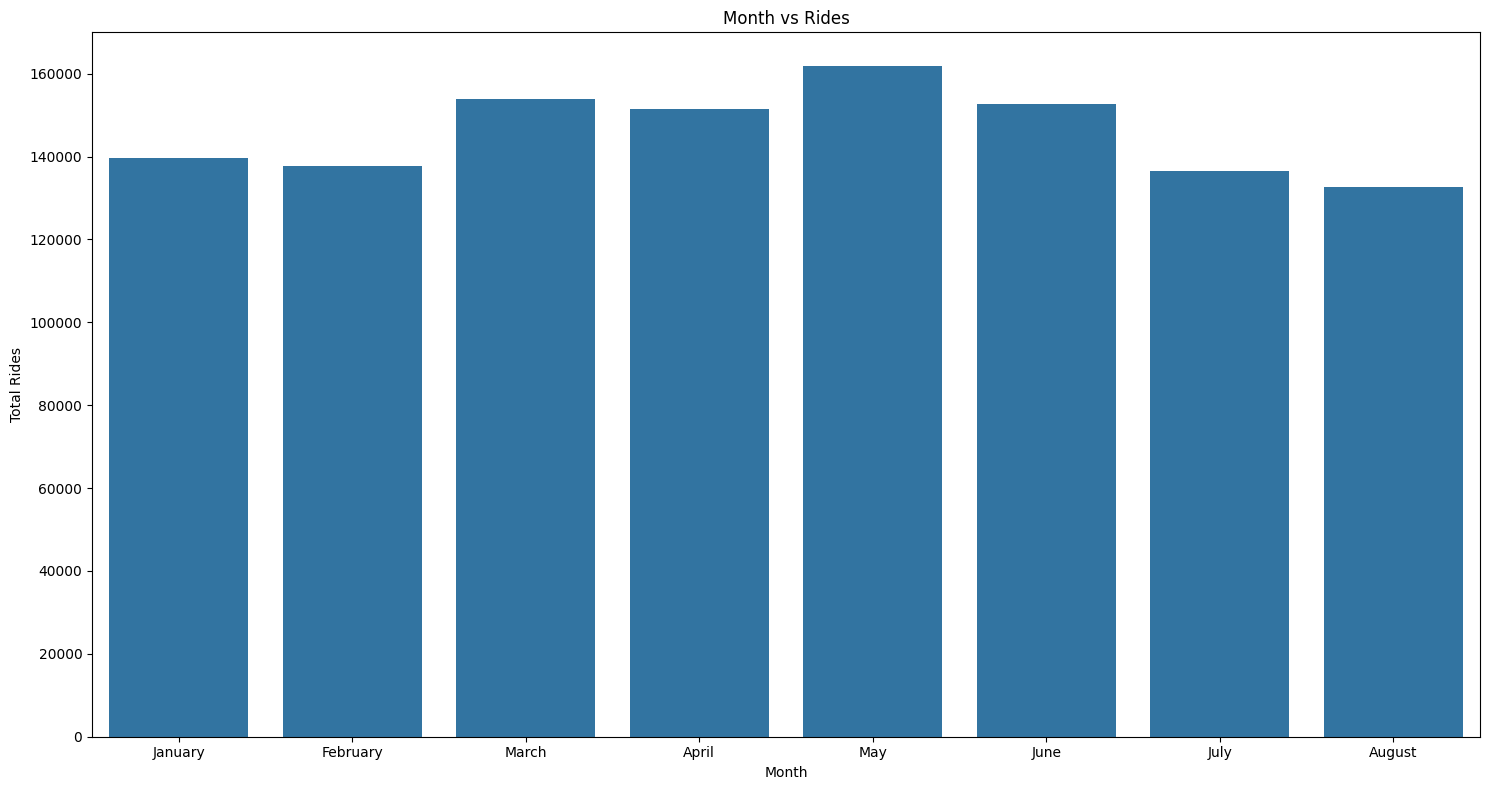

In [190]:
plt.figure(figsize=(15,8))
sns.countplot(x='month',data=tlcdf)
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.title('Month vs Rides')
plt.tight_layout()

# Months in Days v/s Total Rides

In [191]:
visual1 = tlcdf.groupby(['days','month']).size().reset_index(name='counts')
visual1

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\211007931.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,days,month,counts
0,Monday,January,19079
1,Monday,February,16106
2,Monday,March,17224
3,Monday,April,21803
4,Monday,May,17572
5,Monday,June,18881
6,Monday,July,21290
7,Monday,August,15695
8,Tuesday,January,22002
9,Tuesday,February,17903


In [192]:
px.bar(data_frame = visual1 , x = 'days',y='counts', color = 'month',category_orders = {'month':order_months,'days':order_days},barmode='group',width = 1100 ,height = 700)

# Days in Months Trend Line chart

C:\Users\saysa\AppData\Local\Temp\ipykernel_17884\1505618051.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Text(0.5, 1.0, 'Month & Days vs Rides')

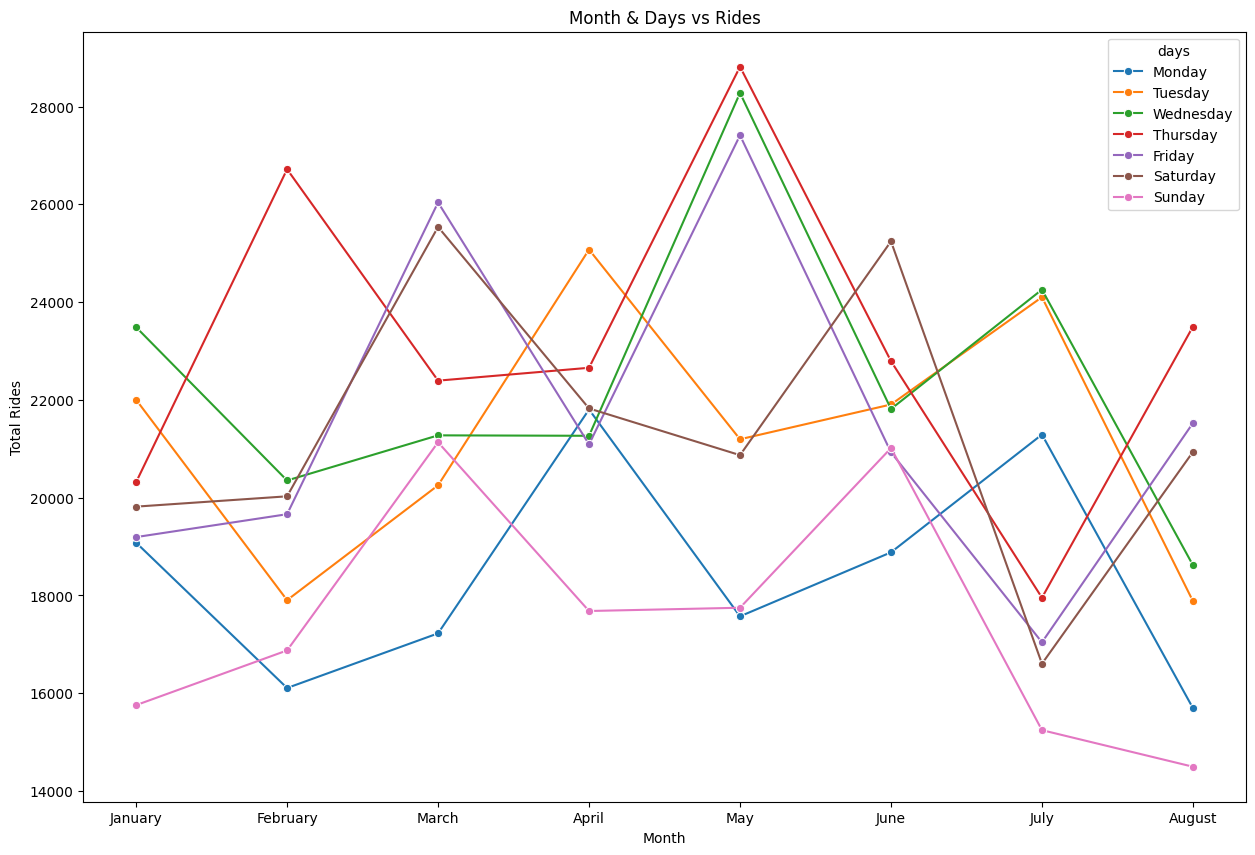

In [193]:
visual2 = tlcdf.groupby(['month','days']).size().reset_index(name='counts')
plt.figure(figsize=(15,10))
sns.lineplot(data = visual2, x='month', y='counts',hue='days', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.title('Month & Days vs Rides')

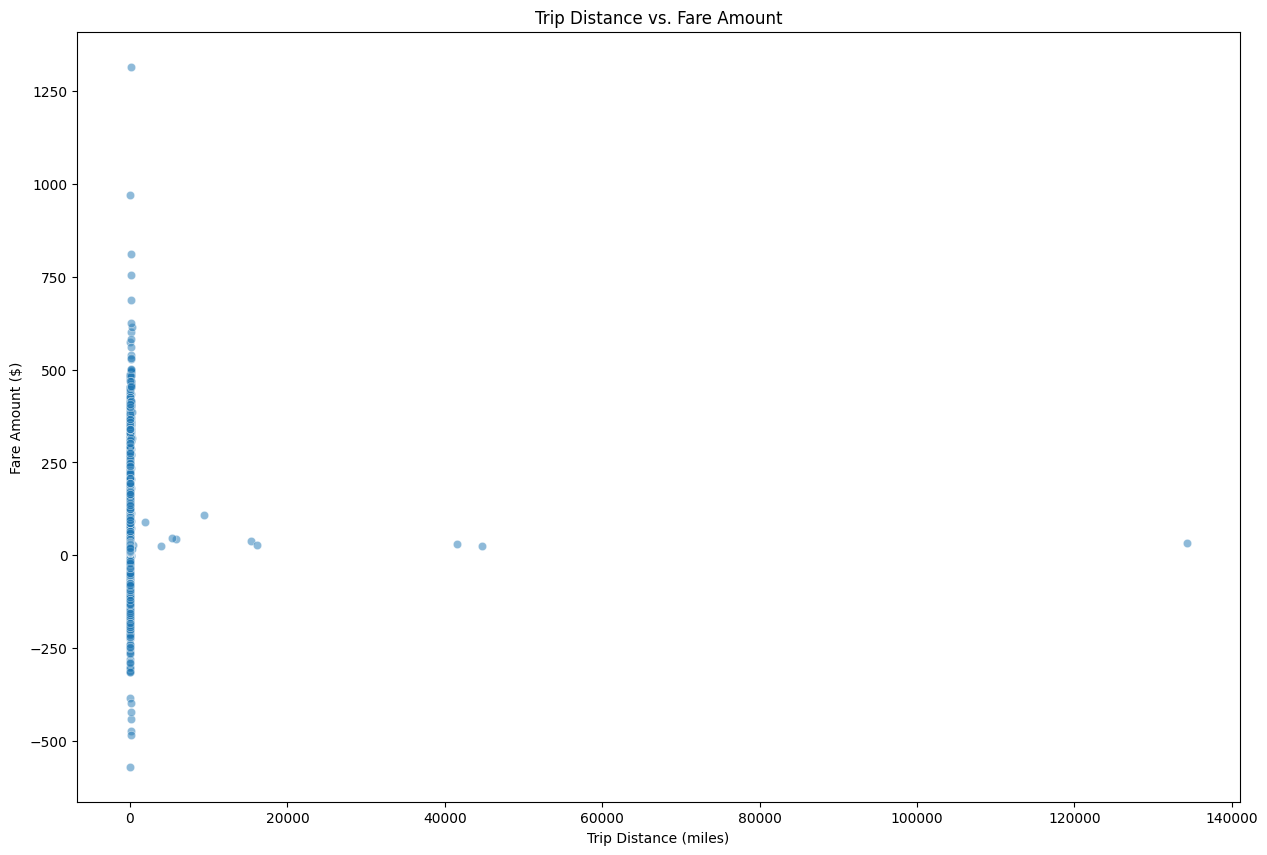

In [194]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=tlcdf, x='trip_distance', y='final_bill', alpha=0.5)
plt.title("Trip Distance vs. Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

Turned out that the scatterplot is not correct and showing negative values of Fare amounts. so we need to need why this error is happening.

In [195]:
tlcdf.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'Airport_fee',
       'final_bill', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time', 'pickup_hours', 'dropoff_hours', 'time_difference',
       'days', 'month', 'daynumber'],
      dtype='object')

In [196]:
tlcdf[tlcdf['trip_distance']==0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_hours,dropoff_hours,time_difference,days,month,daynumber
963230,2,1.0,0.0,2.0,N,132,230,1,70.0,0.0,...,2024-01-12,1900-01-01 11:02:46,2024-01-12,1900-01-01 12:00:57,11,12,0 days 00:58:11,Friday,January,12
350508,1,1.0,0.0,1.0,N,243,191,1,47.5,0.0,...,2024-01-05,1900-01-01 11:49:15,2024-01-05,1900-01-01 12:36:51,11,12,0 days 00:47:36,Friday,January,5
14827,2,1.0,0.0,1.0,N,229,229,2,-3.0,-1.0,...,2024-01-01,1900-01-01 02:08:29,2024-01-01,1900-01-01 02:08:36,2,2,0 days 00:00:07,Monday,January,1
397106,1,1.0,0.0,99.0,N,42,72,1,56.5,0.0,...,2024-01-05,1900-01-01 18:08:33,2024-01-05,1900-01-01 19:09:18,18,19,0 days 01:00:45,Friday,January,5
1590337,2,4.0,0.0,1.0,N,249,114,1,7.2,1.0,...,2024-01-18,1900-01-01 22:12:49,2024-01-18,1900-01-01 22:19:34,22,22,0 days 00:06:45,Thursday,January,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150272,2,1.0,0.0,1.0,N,114,114,4,3.7,1.0,...,2024-01-25,1900-01-01 01:12:21,2024-01-25,1900-01-01 01:13:34,1,1,0 days 00:01:13,Thursday,January,25
691599,2,1.0,0.0,1.0,N,90,186,3,3.0,0.0,...,2024-01-09,1900-01-01 13:14:19,2024-01-09,1900-01-01 13:14:43,13,13,0 days 00:00:24,Tuesday,January,9
2183044,2,1.0,0.0,1.0,N,166,166,4,3.0,0.0,...,2024-01-25,1900-01-01 13:51:13,2024-01-25,1900-01-01 13:51:59,13,13,0 days 00:00:46,Thursday,January,25
2562512,1,1.0,0.0,99.0,N,162,48,1,16.5,0.0,...,2024-01-29,1900-01-01 10:01:55,2024-01-29,1900-01-01 10:15:29,10,10,0 days 00:13:34,Monday,January,29


In [197]:
tlcdf[tlcdf['final_bill']<0][['fare_amount','extra','mta_tax','tip_amount', 'tolls_amount','improvement_surcharge', 'congestion_surcharge', 'Airport_fee','final_bill']]

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,final_bill
330747,-7.9,0.0,-0.5,0.0,0.0,-1.0,-2.5,0.00,-11.90
861350,-10.7,0.0,-0.5,0.0,0.0,-1.0,-2.5,0.00,-14.70
14827,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-2.5,0.00,-8.00
501688,-31.7,-1.0,-0.5,0.0,0.0,-1.0,-2.5,0.00,-36.70
1049221,-28.9,-1.0,-0.5,0.0,0.0,-1.0,-2.5,0.00,-33.90
...,...,...,...,...,...,...,...,...,...
430426,-16.3,-2.5,-0.5,0.0,0.0,-1.0,-2.5,0.00,-22.80
2571829,-15.6,0.0,-0.5,0.0,0.0,-1.0,-2.5,0.00,-19.60
1930742,-14.9,-2.5,-0.5,0.0,0.0,-1.0,-2.5,0.00,-21.40
2182074,-10.7,0.0,-0.5,0.0,0.0,-1.0,-2.5,0.00,-14.70


Now we see that some rows of Fare amounts are captured in negative. We only need to make them positive and can carry on with our analysis.

In [198]:
tlcdf[['fare_amount','extra','mta_tax','tip_amount', 'tolls_amount','improvement_surcharge', 'congestion_surcharge', 'Airport_fee','final_bill']].abs()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,final_bill
2407855,38.0,0.0,0.5,0.00,0.00,1.0,2.5,0.00,42.00
852755,19.1,2.5,0.5,5.75,0.00,1.0,2.5,0.00,31.35
1251882,47.1,5.0,0.5,12.96,6.94,1.0,2.5,1.75,77.75
1070486,19.8,2.5,0.5,4.75,0.00,1.0,2.5,0.00,31.05
649000,33.1,1.0,0.5,0.00,0.00,1.0,0.0,1.75,37.35
...,...,...,...,...,...,...,...,...,...
1836814,11.4,5.0,0.5,3.60,0.00,1.0,2.5,0.00,24.00
524818,18.4,5.0,0.5,4.00,0.00,1.0,2.5,0.00,31.40
1249916,14.9,3.5,0.5,0.00,0.00,1.0,2.5,0.00,22.40
1210836,8.6,0.0,0.5,0.00,0.00,1.0,0.0,0.00,10.10


In [199]:
tlcdf[['fare_amount','extra','mta_tax','tip_amount', 'tolls_amount','improvement_surcharge', 'congestion_surcharge', 'Airport_fee','final_bill']] = tlcdf[['fare_amount','extra','mta_tax','tip_amount', 'tolls_amount','improvement_surcharge', 'congestion_surcharge', 'Airport_fee','final_bill']].abs()

In [200]:
#checking if any negative values are left
tlcdf[tlcdf['final_bill']<0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_hours,dropoff_hours,time_difference,days,month,daynumber


# -Analysing the anomalies in trip distance, Fare amounts and Passenger count

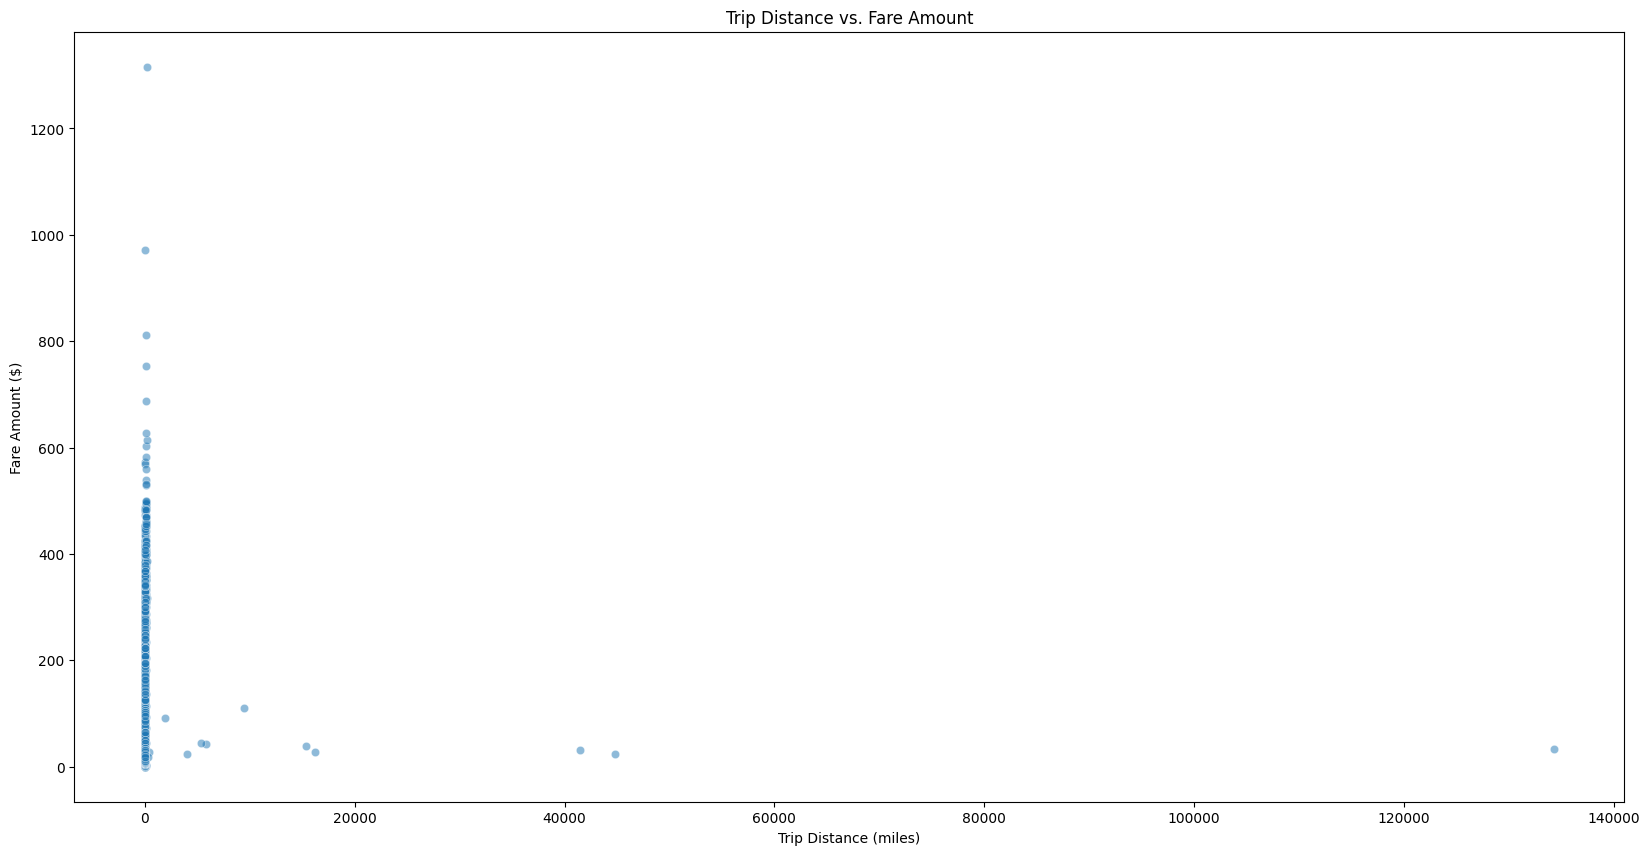

In [201]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=tlcdf, x='trip_distance', y='final_bill', alpha=0.5)
plt.title("Trip Distance vs. Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

Earlier we have removed all the invalid entries in trip distance, but we see there are some more discrepancies with the trend. 
Some highly covered trip distances have significantly less fare amounts. Let us remove them as we can consider them as invalid entries since other columns are not wrong respectively.

In [202]:
tlcdf[(tlcdf['trip_distance']>200) & (tlcdf['trip_distance']<300)][['final_bill','trip_distance']]

,final_bill,trip_distance
3173137,316.38,249.30
2242353,17.60,264.03
1275585,386.38,243.34


In [203]:
tlcdf.drop(tlcdf[(tlcdf['trip_distance']>200) & (tlcdf['trip_distance']<300)][['final_bill','trip_distance']].index[1],inplace=True)

In [204]:
tlcdf[(tlcdf['trip_distance']>300) & (tlcdf['trip_distance']<400)][['final_bill','trip_distance']]

,final_bill,trip_distance
2843328,27.07,380.2


In [205]:
tlcdf.drop(tlcdf[(tlcdf['trip_distance']>300) & (tlcdf['trip_distance']<400)][['final_bill','trip_distance']].index,inplace=True)

In [206]:
tlcdf[tlcdf['trip_distance']>400][['final_bill','trip_distance']]

,final_bill,trip_distance
1433602,39.48,15400.32
1015911,31.00,41514.00
1175717,90.78,1918.04
938066,34.00,134298.40
476679,24.00,4003.25
587656,24.72,44791.75
2919775,42.51,5832.89
1811790,28.00,16185.60
656559,109.66,9442.12
306812,45.45,5383.23


In [207]:
tlcdf.drop(tlcdf[tlcdf['trip_distance']>400][['final_bill','trip_distance']].index,inplace=True)

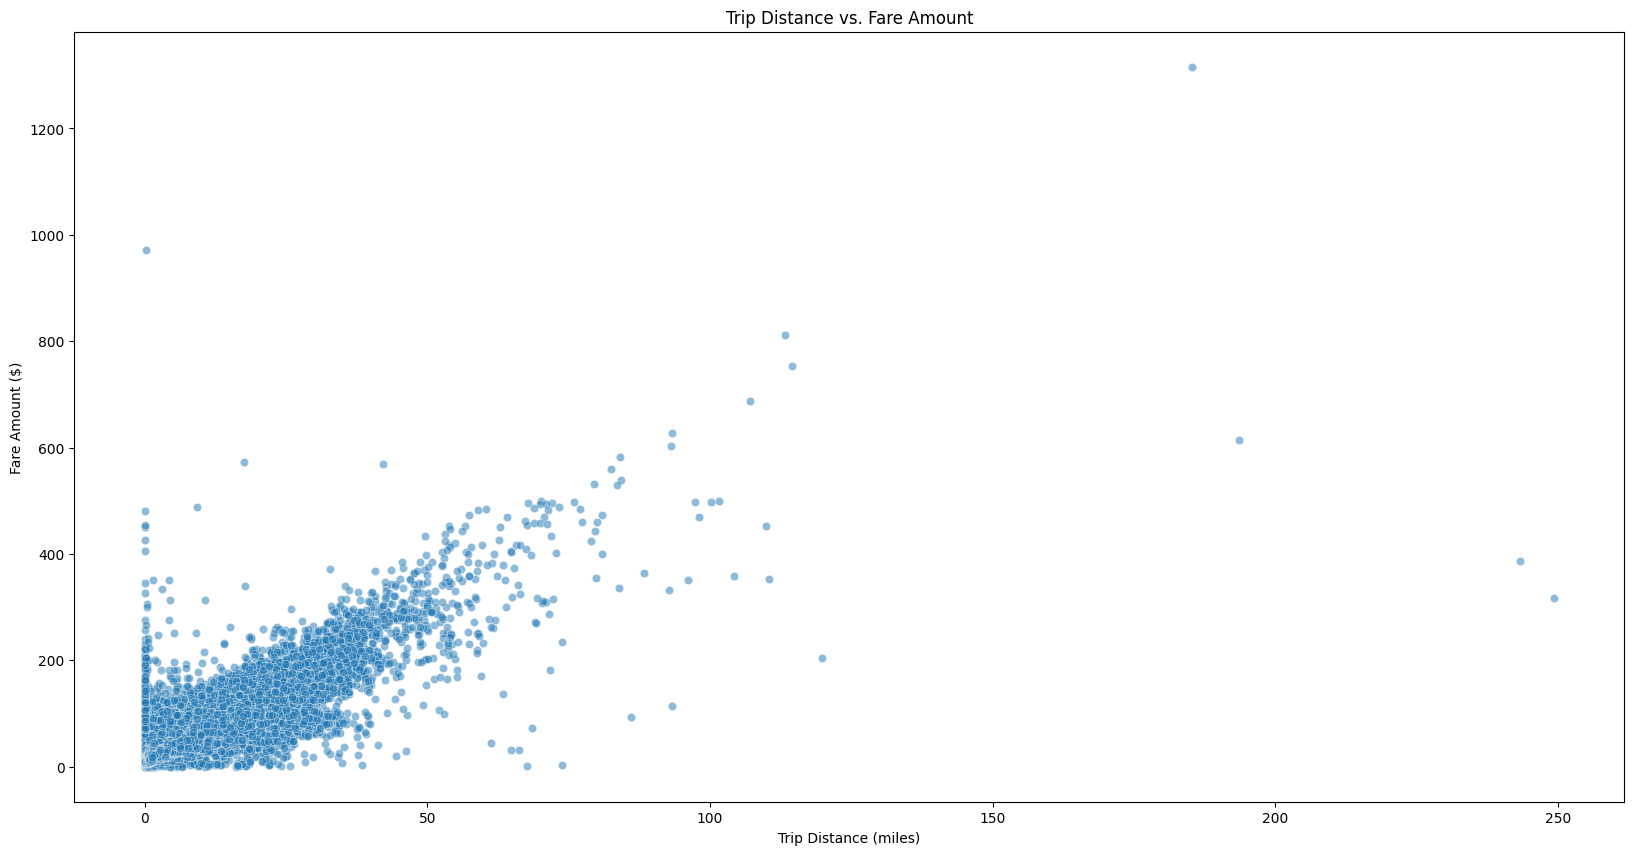

In [208]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=tlcdf, x='trip_distance', y='final_bill', alpha=0.5)
plt.title("Trip Distance vs. Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

In [209]:
tlcdf[(tlcdf['trip_distance']<30) & (tlcdf['final_bill']>300)][['final_bill','trip_distance']]

,final_bill,trip_distance
1700693,406.09,0.00
2787241,426.00,0.00
824285,326.00,0.00
2287334,306.60,0.40
361533,488.75,9.14
3331,481.20,0.10
2386219,573.60,17.49
1550875,313.00,4.43
186524,333.20,3.08
1740379,351.00,4.30


In [210]:
tlcdf.drop(tlcdf[(tlcdf['trip_distance']<30) & (tlcdf['final_bill']>300)][['final_bill','trip_distance']].index,inplace=True)

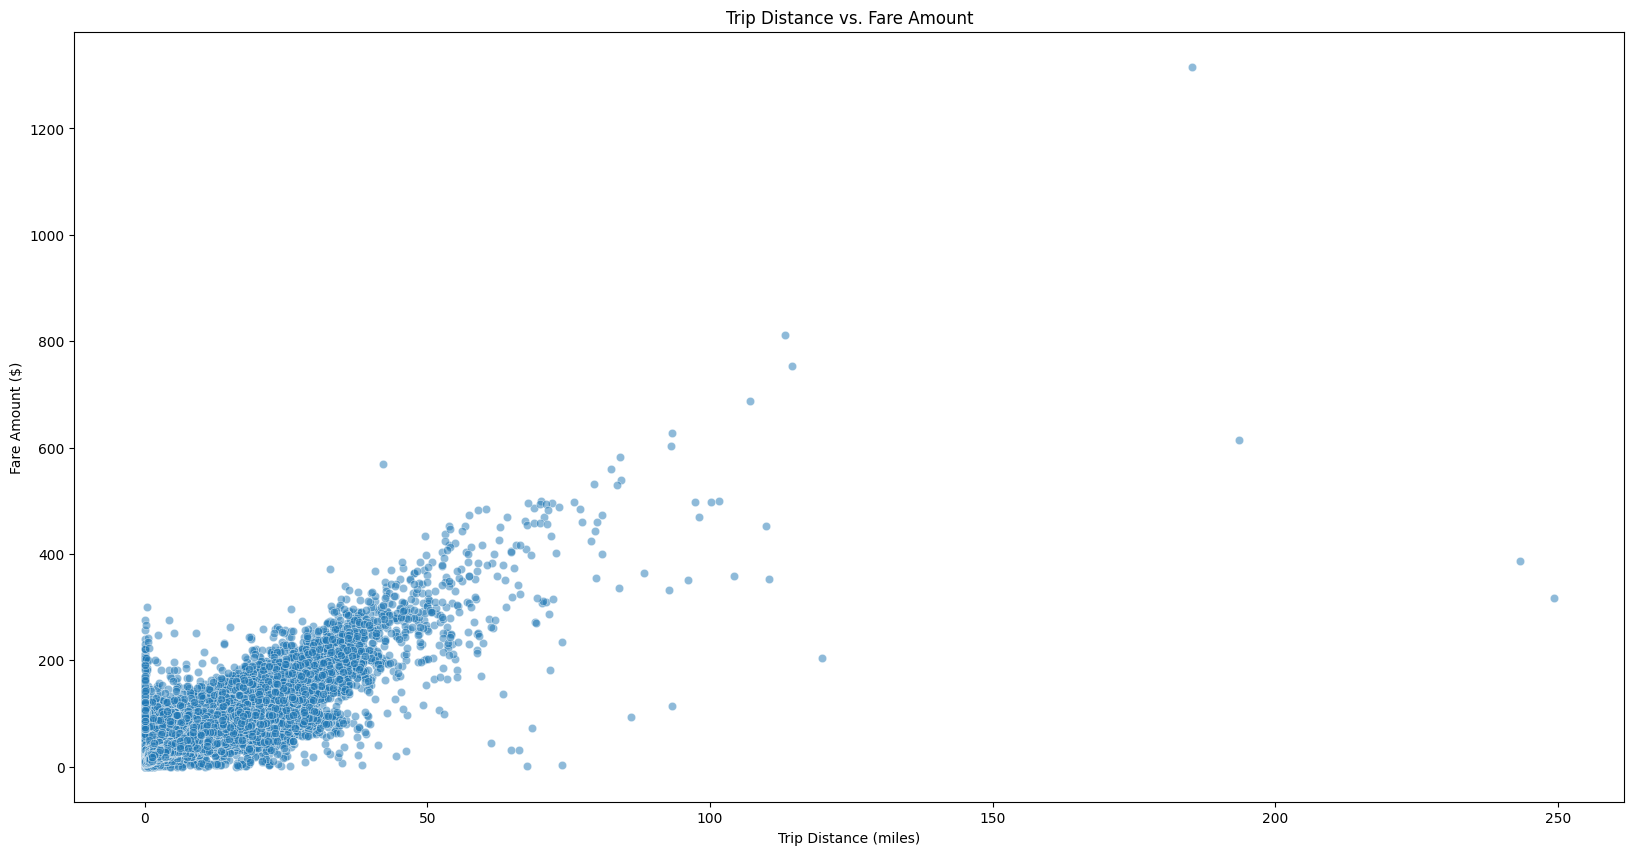

In [211]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=tlcdf, x='trip_distance', y='final_bill', alpha=0.5)
plt.title("Trip Distance vs. Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

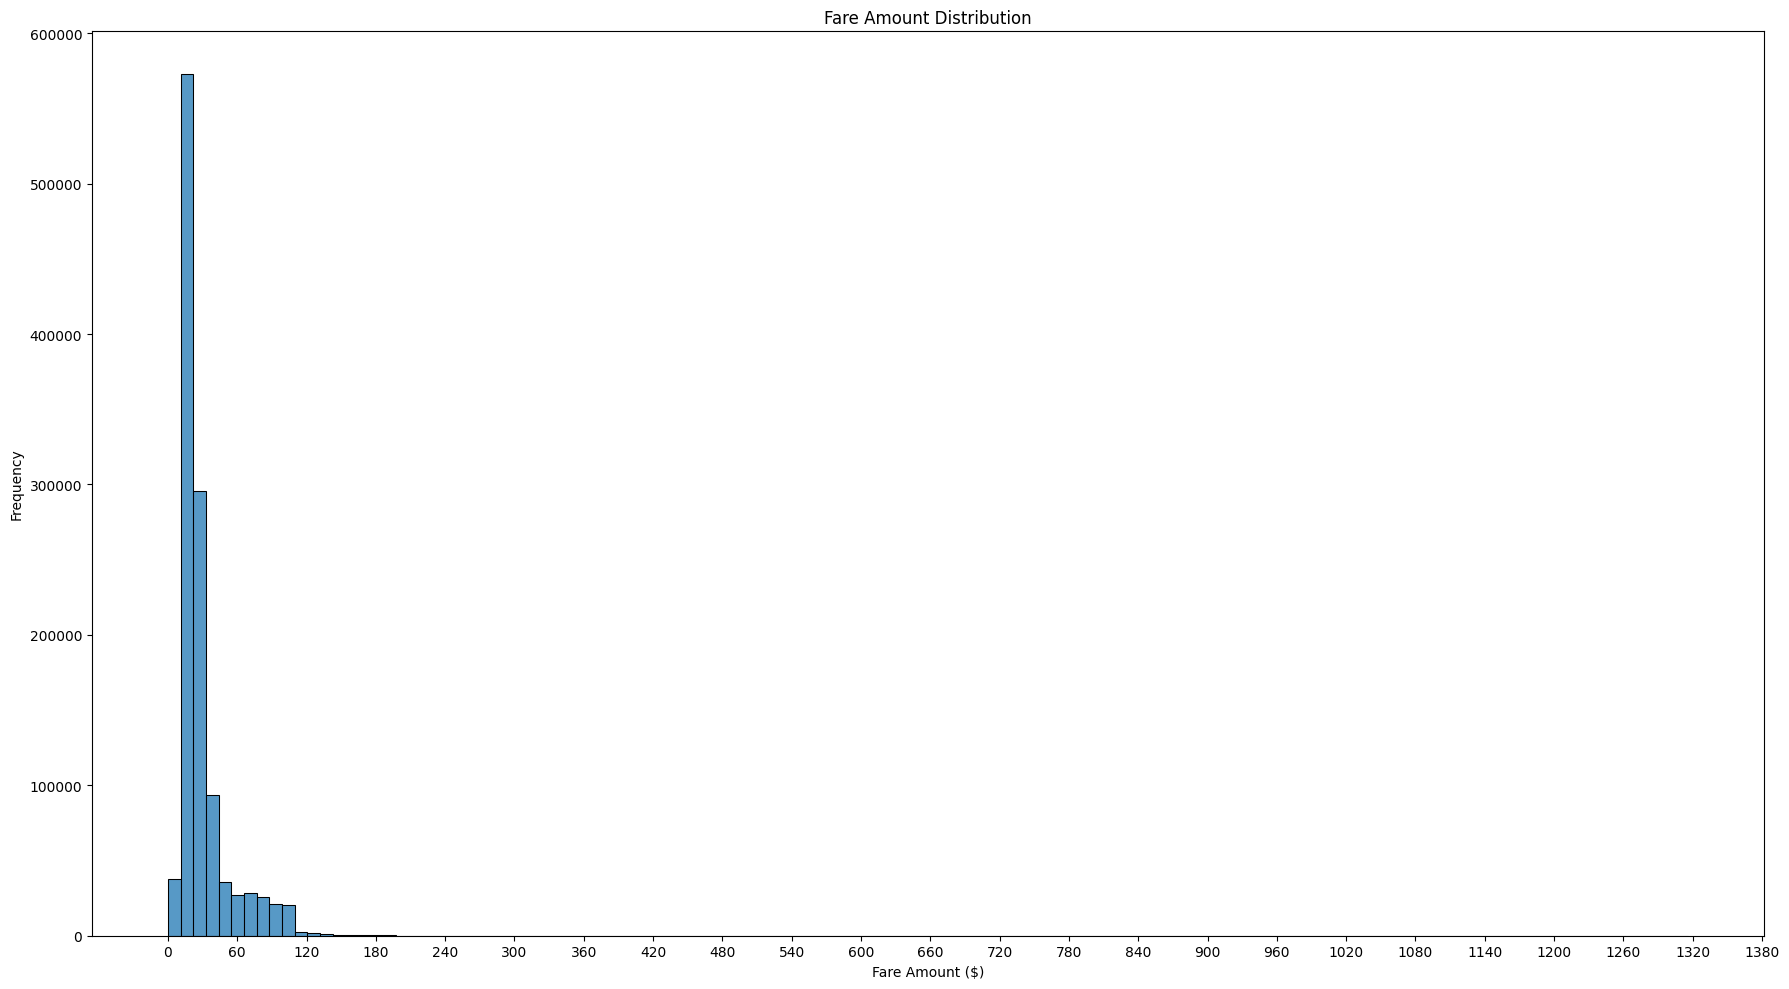

In [212]:
plt.figure(figsize=(18, 10))
sns.histplot(data=tlcdf['final_bill'],bins = 120)
plt.title("Fare Amount Distribution")
plt.ylabel("Frequency")
plt.xlabel("Fare Amount ($)")
plt.xticks(np.arange(0,1400,60))
plt.tight_layout()
plt.show()

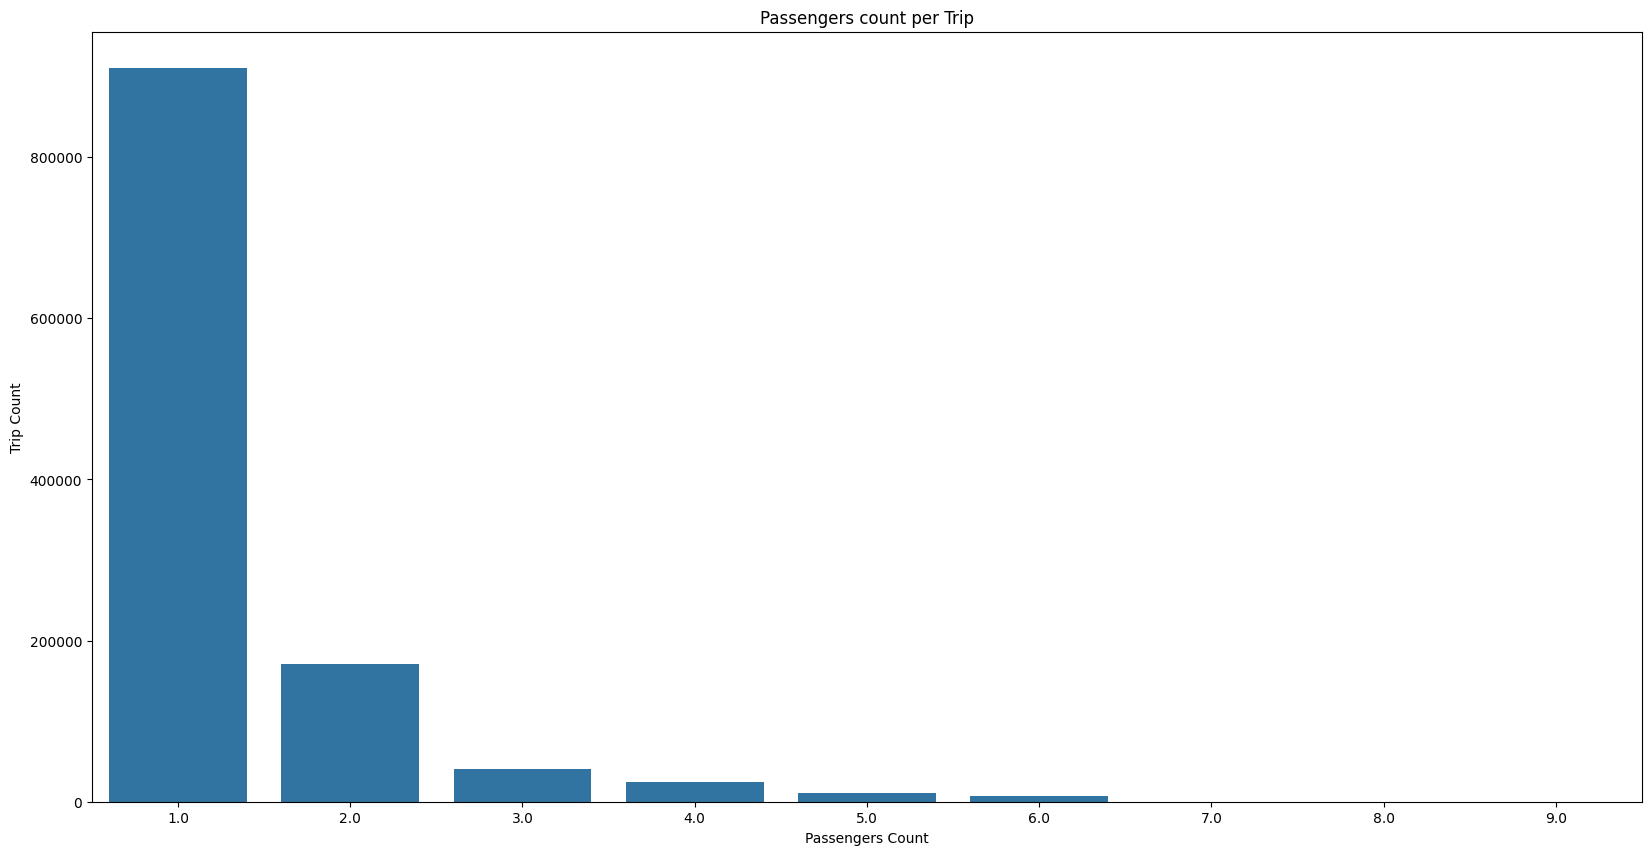

In [213]:
plt.figure(figsize=(20, 10))
sns.countplot(data=tlcdf,x= 'passenger_count')
plt.title("Passengers count per Trip")
plt.ylabel("Trip Count")
plt.xlabel("Passengers Count")
plt.show()

# - RELATIONSHIP between Passengers and Final Bill

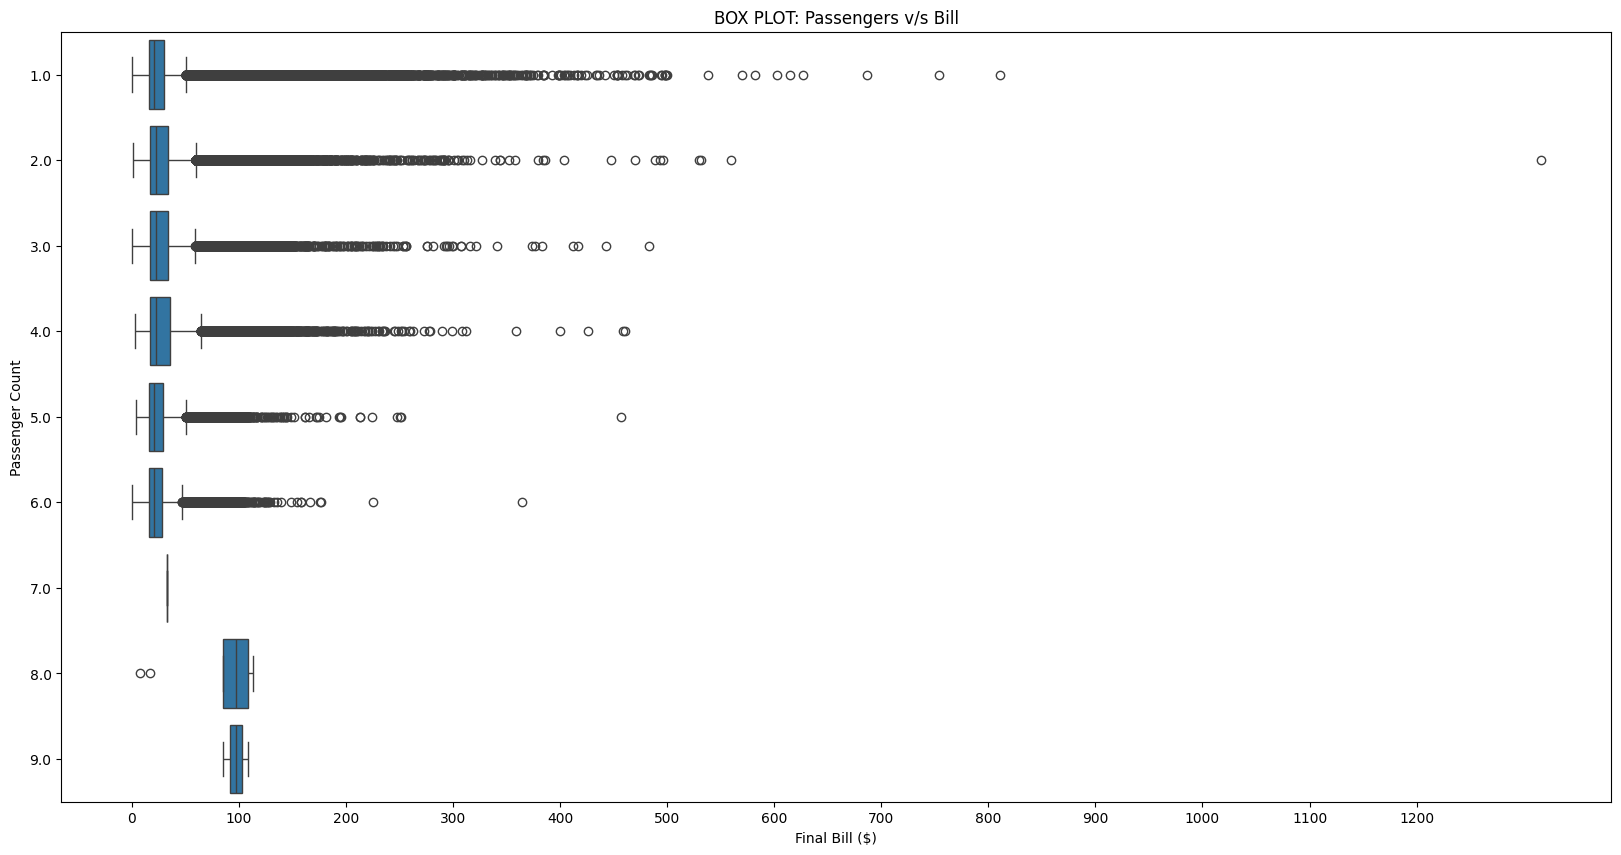

In [214]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='final_bill', y='passenger_count', data=tlcdf,orient = 'h')
plt.xticks(np.arange(0,1300,100))
plt.xlabel('Final Bill ($)')
plt.title('BOX PLOT: Passengers v/s Bill')
plt.ylabel('Passenger Count')
plt.show()

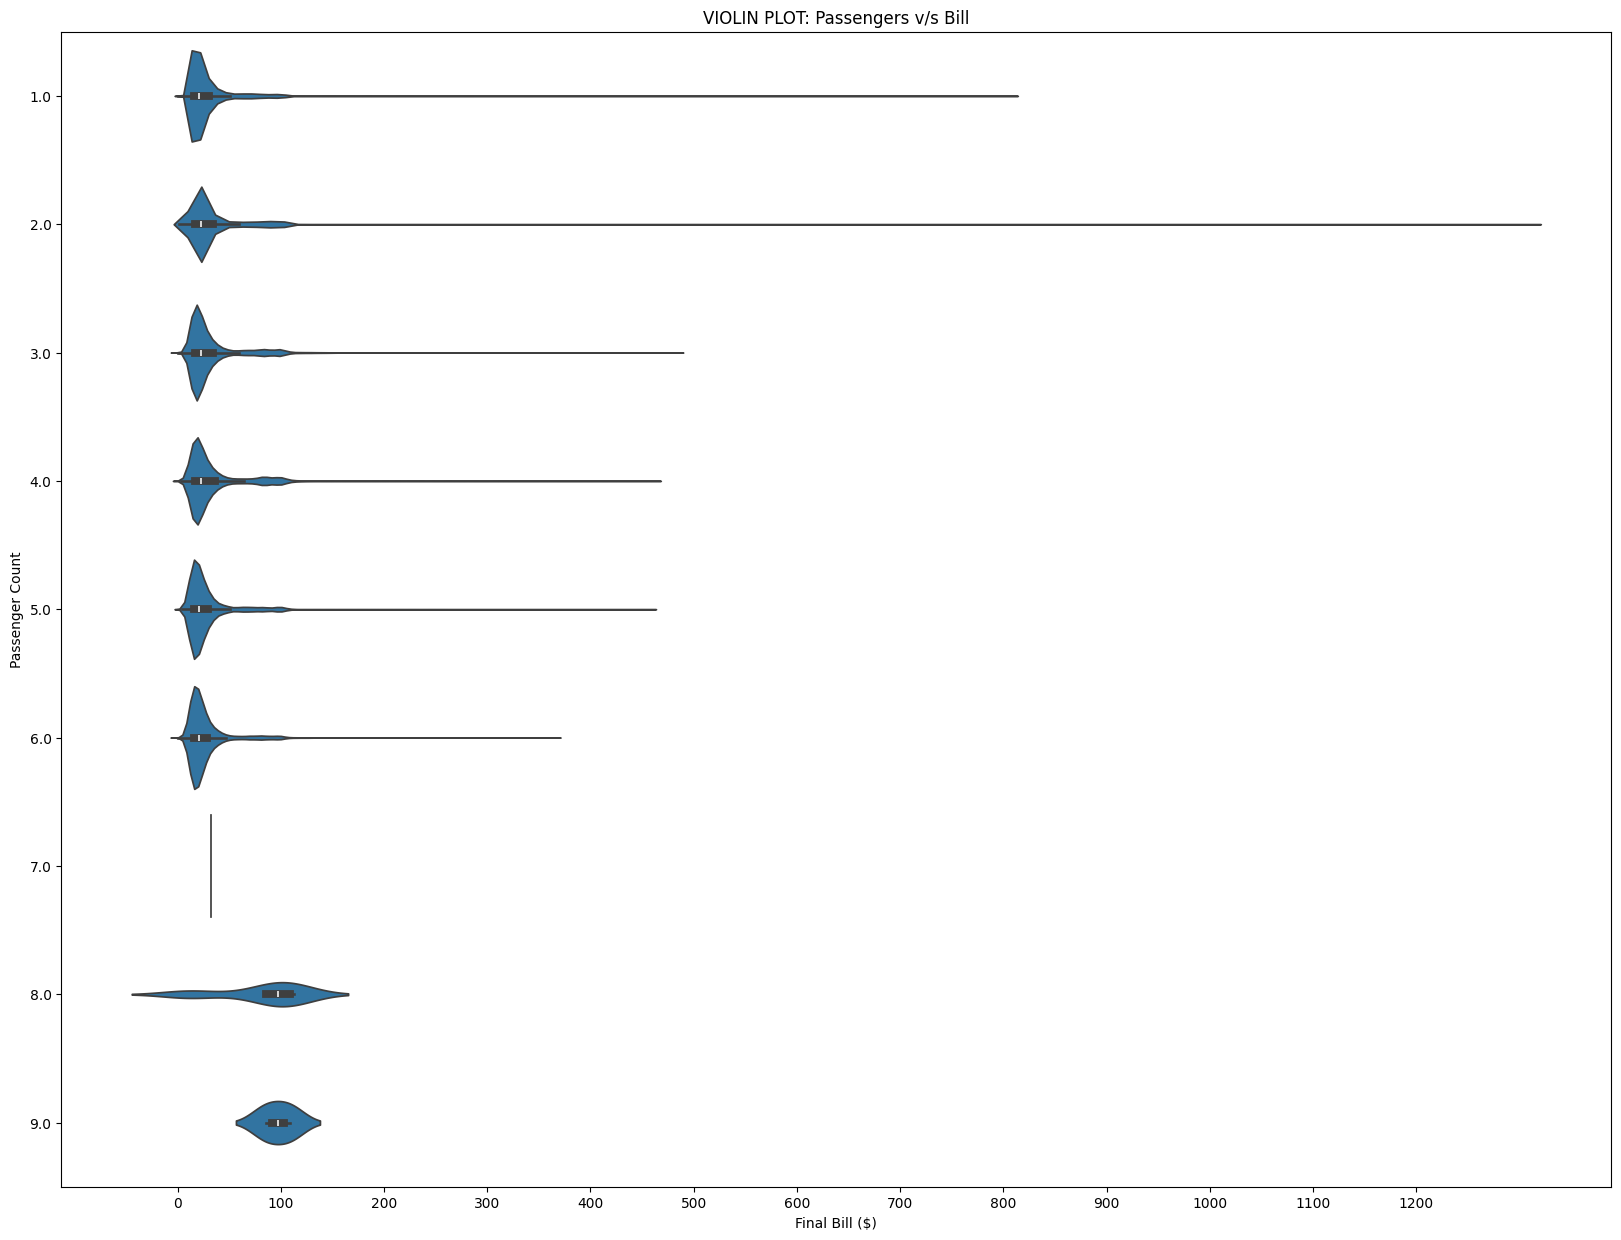

In [215]:
plt.figure(figsize=(20, 15))
sns.violinplot(x='final_bill', y='passenger_count', data=tlcdf,orient = 'h')
plt.xticks(np.arange(0,1300,100))
plt.xlabel('Final Bill ($)')
plt.title('VIOLIN PLOT: Passengers v/s Bill')
plt.ylabel('Passenger Count')
plt.show()

# -Location & Traffic Analysis

Let's calculate top 20 pickup and top 20 dropoff locations.

In [216]:
tlcdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1166097 entries, 2407855 to 503651
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   VendorID               1166097 non-null  int32          
 1   passenger_count        1166097 non-null  float64        
 2   trip_distance          1166097 non-null  float64        
 3   RatecodeID             1166097 non-null  float64        
 4   store_and_fwd_flag     1166097 non-null  object         
 5   PULocationID           1166097 non-null  int32          
 6   DOLocationID           1166097 non-null  int32          
 7   payment_type           1166097 non-null  int64          
 8   fare_amount            1166097 non-null  float64        
 9   extra                  1166097 non-null  float64        
 10  mta_tax                1166097 non-null  float64        
 11  tip_amount             1166097 non-null  float64        
 12  tolls_amount  

In [217]:
t_pu = tlcdf['PULocationID'].value_counts().head(20).index
t_do = tlcdf['DOLocationID'].value_counts().head(20).index

summary_df = tlcdf[tlcdf['PULocationID'].isin(ten_pu) & tlcdf['DOLocationID'].isin(ten_do)]

In [218]:
visual_location = pd.crosstab (summary_df['PULocationID'],summary_df['DOLocationID'])
visual_location

DOLocationID,48,68,107,140,141,142,161,162,163,164,170,186,229,230,234,236,237,238,239,263
PULocationID,,,,,,,,,,,,,,,,,,,,
48,1729,2246,337,319,412,1567,1368,715,1026,577,679,862,480,1166,522,580,621,846,1227,285
68,1731,1647,722,243,319,734,1148,673,842,866,1085,789,370,1539,1139,440,555,384,607,272
79,350,668,1406,307,487,228,407,628,249,605,1343,601,563,402,853,278,329,190,212,372
107,297,677,732,484,573,239,771,1027,280,662,2038,855,781,395,830,446,582,138,195,390
132,1531,1001,592,413,640,699,1263,988,1216,1529,1107,673,628,2945,551,760,576,659,853,603
138,868,726,555,470,753,659,1568,1196,1059,1231,1013,474,696,2642,492,905,723,602,819,743
141,312,226,391,1311,1712,849,1060,1413,551,290,725,295,1650,327,271,2743,2316,501,668,1807
142,1675,960,291,795,1126,1781,1795,1086,1761,509,622,521,825,1581,469,2080,2259,2401,3224,723
161,1331,1442,1143,1229,1877,1686,2316,1530,2056,2288,1838,1877,1560,2013,2270,3385,4136,767,1319,1087


Text(220.72222222222223, 0.5, 'Pickup Location IDs')

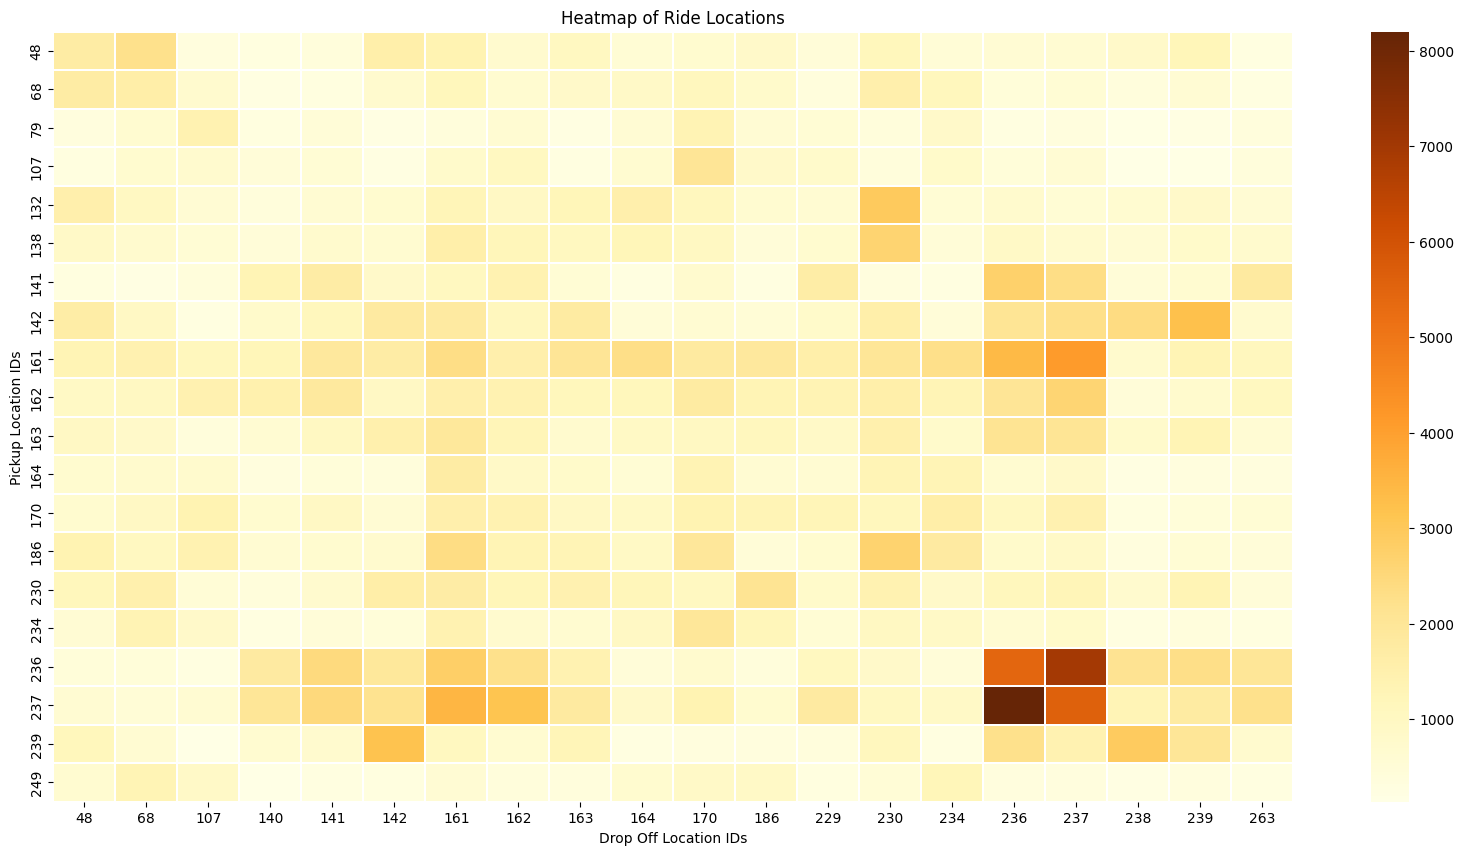

In [219]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=visual_location,linewidth = 0.1 , linecolor= 'white', cmap = 'YlOrBr')
plt.title('Heatmap of Ride Locations')
plt.xlabel('Drop Off Location IDs')
plt.ylabel('Pickup Location IDs')

# - Trip Time Analysis for every clock hours

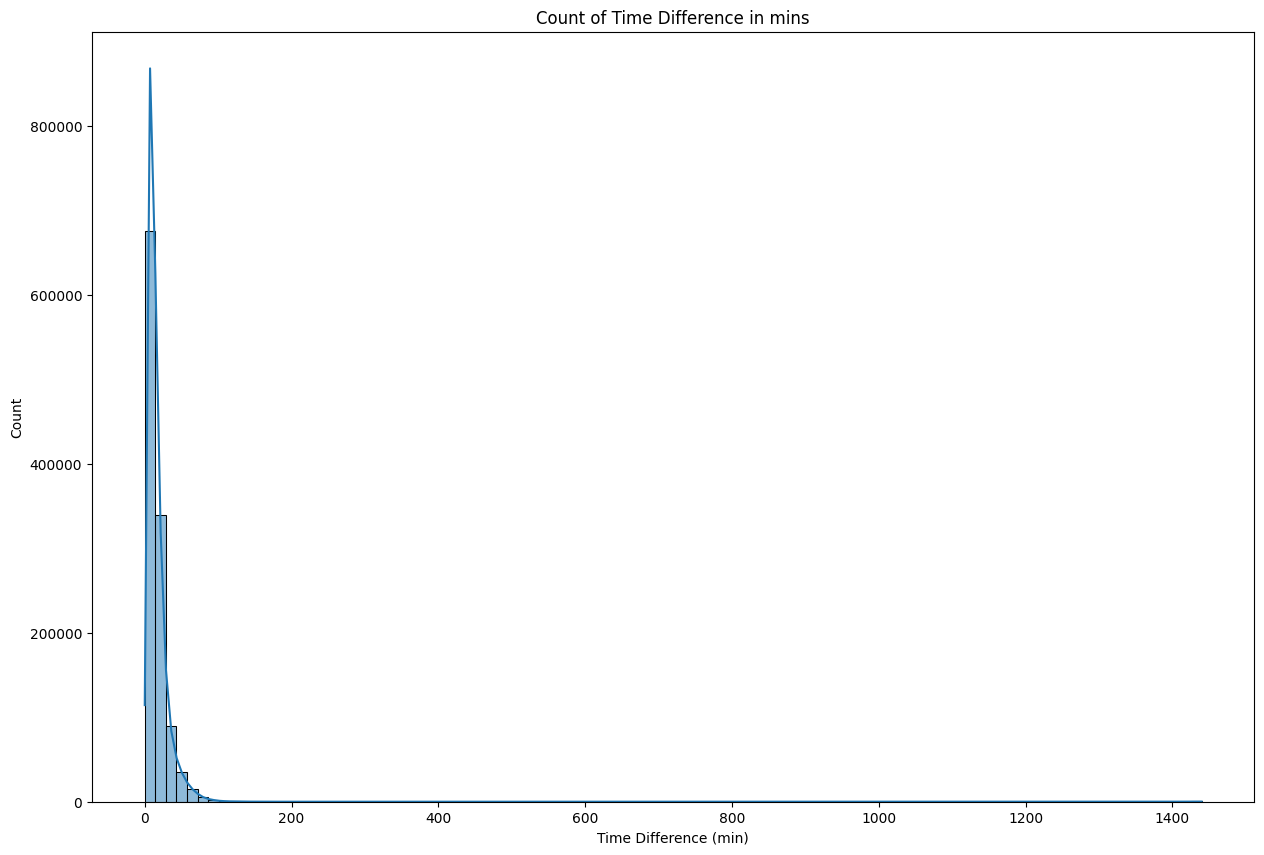

In [220]:
#counting the time difference in all the rides
plt.figure(figsize=(15,10))
sns.histplot(tlcdf['time_difference'].dt.total_seconds()/60 , bins = 100 , kde = True )
plt.title('Count of Time Difference in mins')
plt.xlabel('Time Difference (min)')
plt.show()

In [221]:
time_df= tlcdf.groupby('pickup_hours')['time_difference'].mean().reset_index()

# let's get the avg time difference in minutes as a new column
time_df['time_difference'] = time_df['time_difference'].dt.total_seconds()/60
time_df

,pickup_hours,time_difference
0,0,15.446543
1,1,14.019706
2,2,13.007106
3,3,13.514688
4,4,15.279797
5,5,16.963349
6,6,17.767975
7,7,16.162137
8,8,16.281732
9,9,16.589989


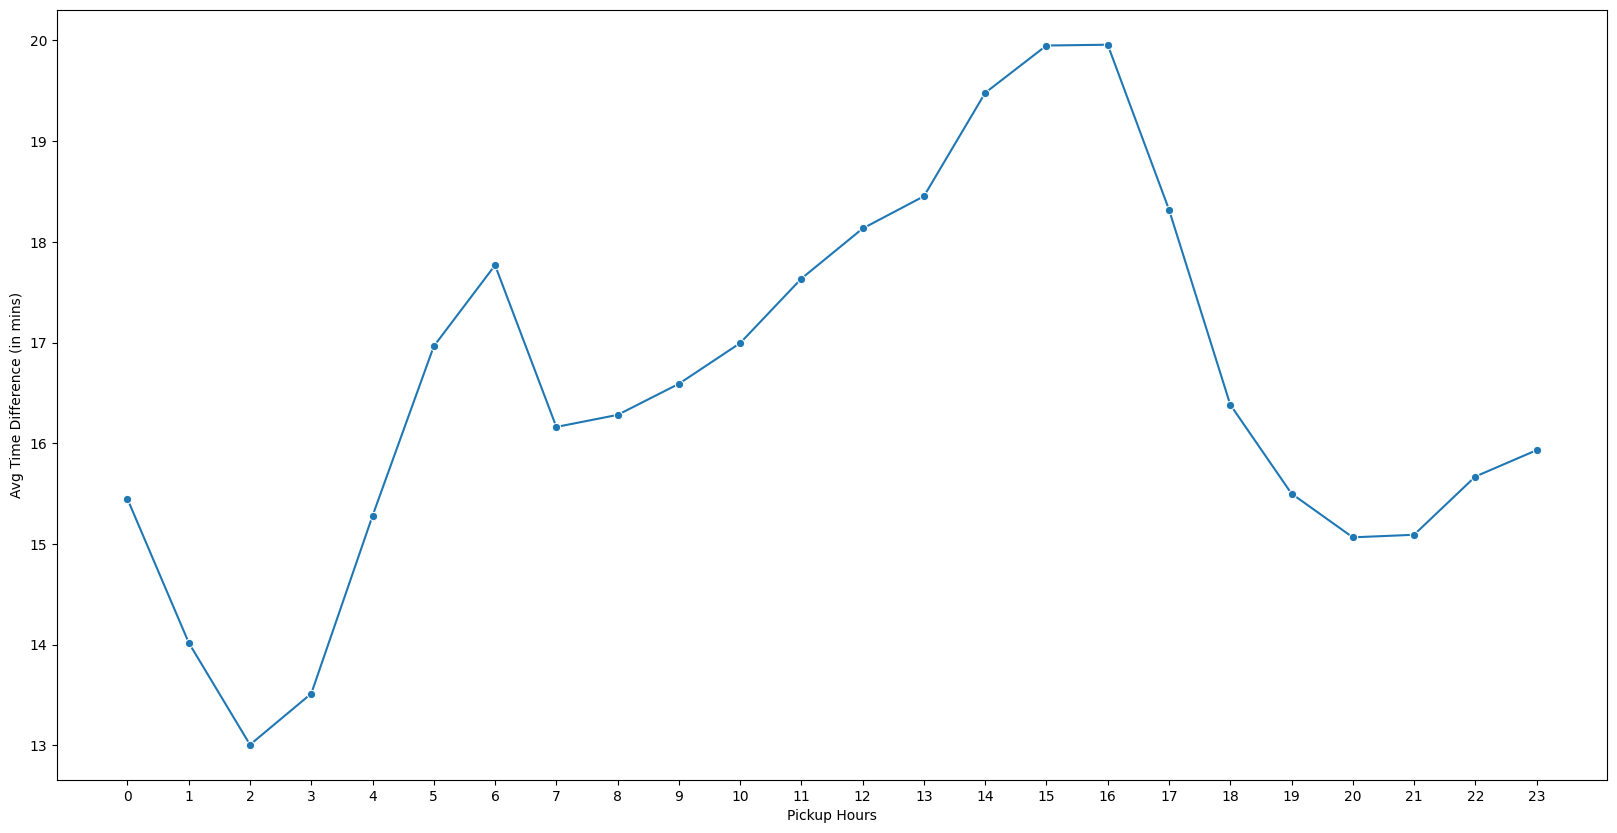

In [222]:
plt.figure(figsize=(20,10))
sns.lineplot(data=time_df, x= 'pickup_hours', y = 'time_difference', marker = 'o')
plt.xticks(np.arange(0,24,1))
plt.xlabel('Pickup Hours')
plt.ylabel('Avg Time Difference (in mins)')
plt.show()

# - Breaking down the Fare components of rides

In [223]:
tlcdf.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'Airport_fee',
       'final_bill', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time', 'pickup_hours', 'dropoff_hours', 'time_difference',
       'days', 'month', 'daynumber'],
      dtype='object')

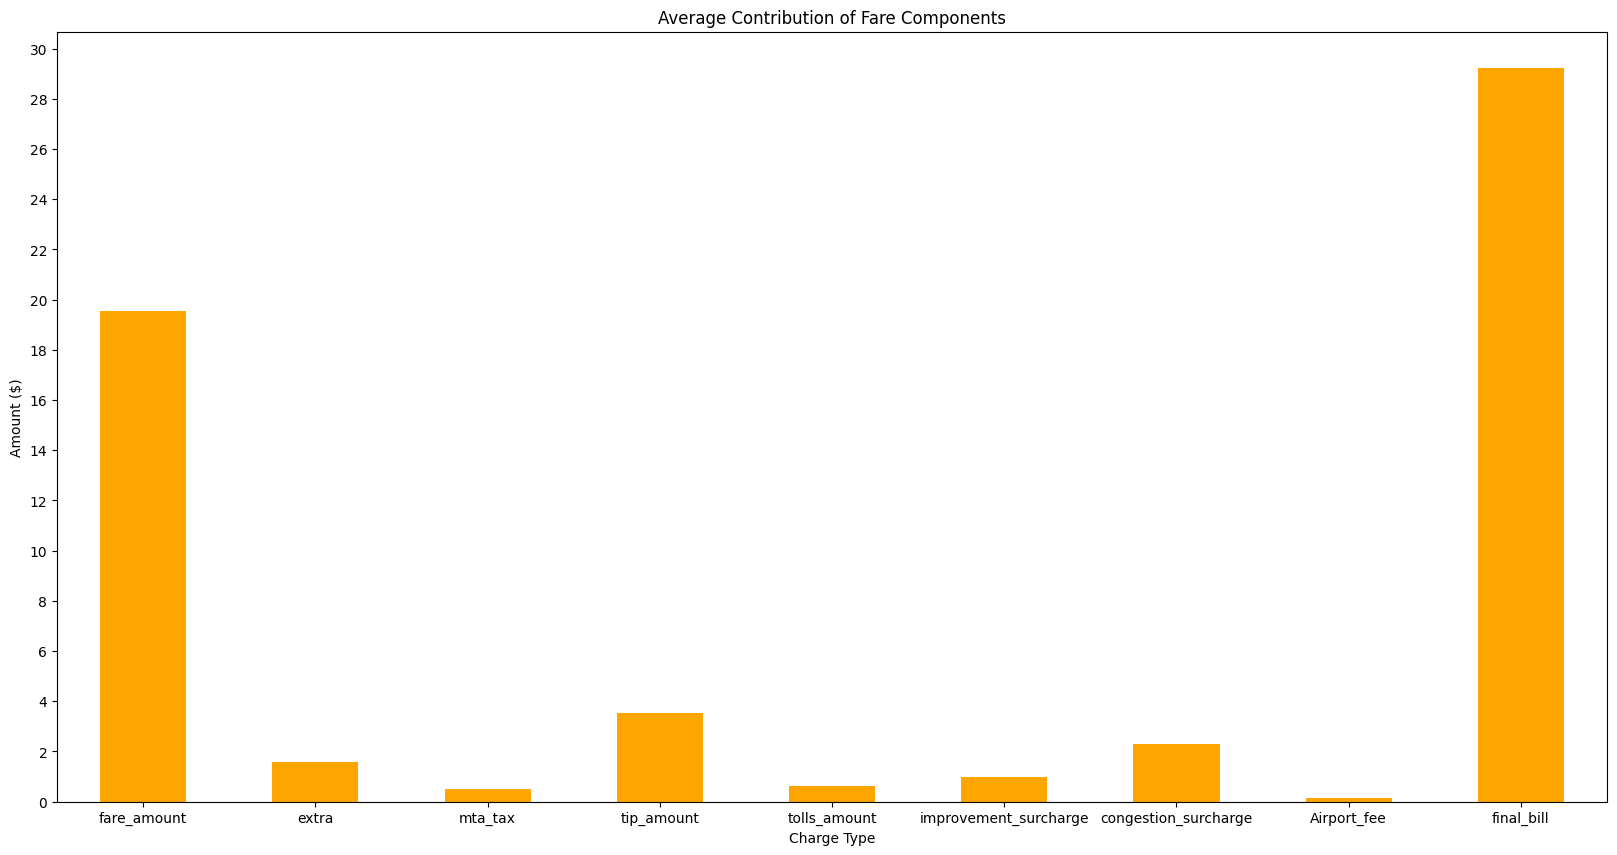

In [224]:
tlcdf[['fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'final_bill']].mean().plot(kind='bar', color='orange', figsize=(20, 10))
plt.title("Average Contribution of Fare Components")
plt.ylabel("Amount ($)")
plt.xlabel("Charge Type")
plt.xticks(rotation=0)
plt.yticks(np.arange(0,32,2))
plt.show()

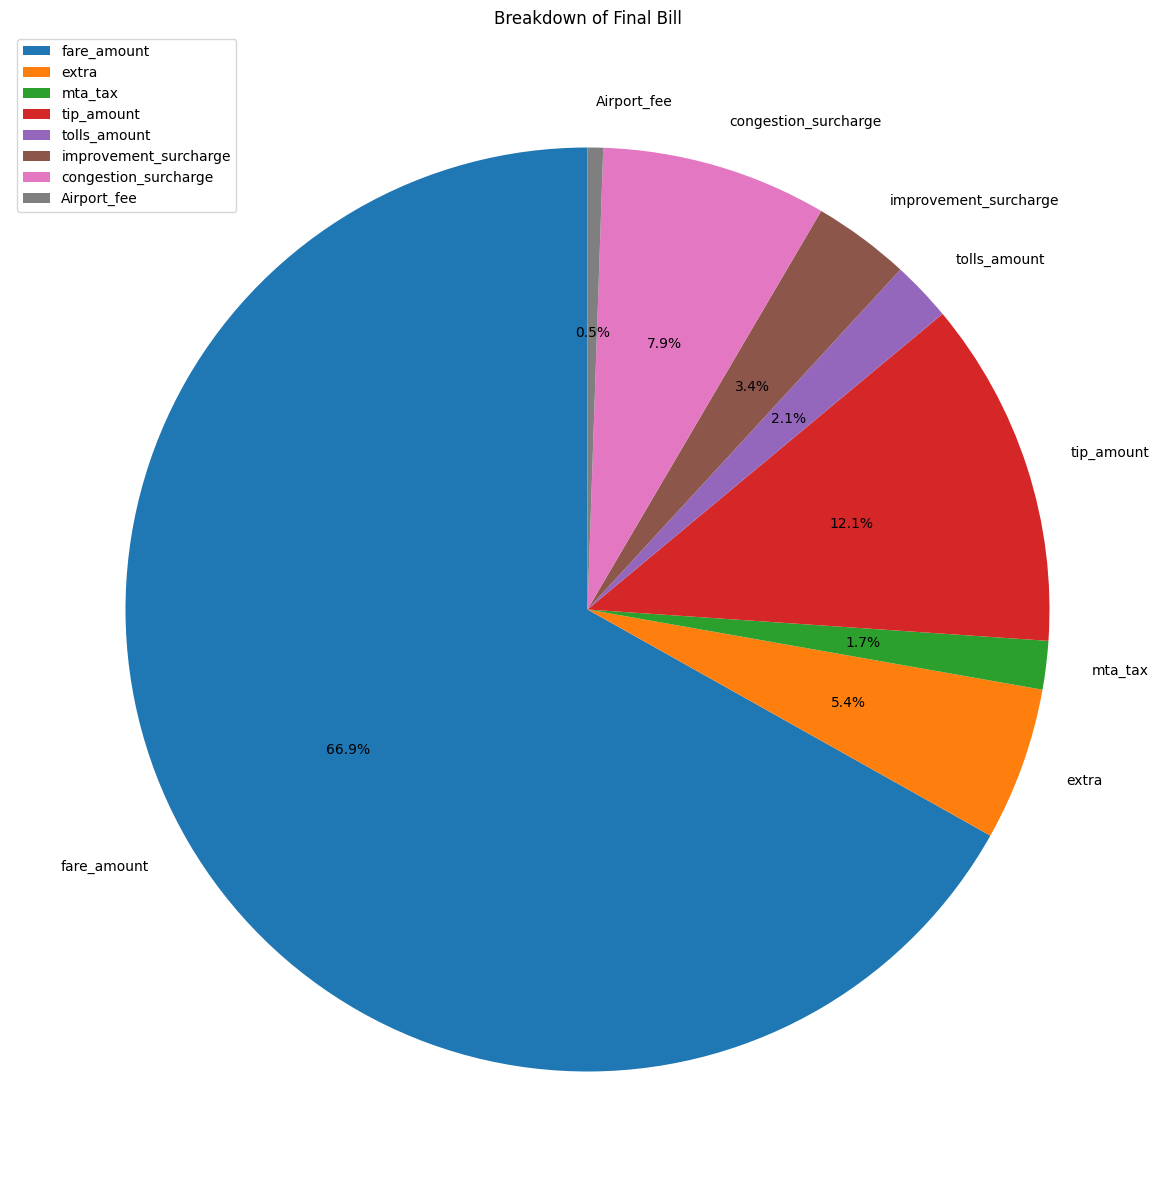

In [225]:
pie_sections = ['fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge', 'congestion_surcharge', 'Airport_fee']
eachsum = tlcdf[pie_sections].sum()

plt.figure(figsize=(15,15))
plt.pie(eachsum, labels = pie_sections,autopct='%1.1f%%',startangle=90)
plt.title('Breakdown of Final Bill')
plt.legend()
plt.show()

# Project Summary

This project involves an in-depth analysis of NYC Taxi and Limousine Commission (TLC) trip data from January–August 2024. Below is a summary of the workflow and key insights based on the analysis:

### 1. Data Cleaning and Preparation
- Identified and handled **missing data** in critical columns like `passenger_count`.
- Addressed **anomalies** such as rows with `passenger_count` = 0, ensuring data accuracy.
- Counted and removed **duplicate rows**, improving data integrity.

### 2. Exploratory Data Analysis (EDA)
#### Passenger Insights:
- Majority of trips involved 1–2 passengers, indicating a dominance of individual or small-group travel.
- Edge cases with invalid `passenger_count` were rectified.

#### Trip Durations:
- Analyzed trip durations to identify patterns, such as peak hours and average trip times.

#### Revenue Analysis:
- Evaluated fare distributions and the impact of additional charges like surcharges or tolls on overall trip costs.
- Highlighted revenue trends across months and affiliated base numbers.

### 3. Geospatial Analysis
- Examined **pickup and drop-off locations**, pinpointing areas with the highest taxi activity.
- Potential insights into hotspot regions and underutilized zones.

### 4. Operational Insights
- Analyzed data by **dispatching base numbers** to evaluate fleet utilization.
- Explored **day-of-week patterns**, revealing peak taxi usage during weekdays vs. weekends.

---

## Key Outcomes and Recommendations

1. **Passenger Behavior**:
   - Optimizing fleet distribution to meet demand during peak hours and in high-traffic zones.

2. **Revenue Insights**:
   - Strategies to enhance profitability by targeting peak periods and high-revenue locations.

3. **Data-Driven Decision Making**:
   - Providing actionable insights for TLC and fleet managers to improve service quality.
